# McNulty Additional EDA

In [1]:
# %pylab inline
# %config InlineBackend.figure_formats = ['retina']

from collections import OrderedDict

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import pickle

In [2]:
# Pickle opening code
with open('sc_scaled.pickle','rb') as read_file:
    scs = pickle.load(read_file)

# Pickle opening code
with open('sc_noscale.pickle','rb') as read_file:
    scns = pickle.load(read_file)

In [3]:
scns.head(2)

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
1,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852


In [4]:
# Create data only df of the non-scaled data
scns_X = scns.drop('LeagueIndex', axis=1)
scs_X = scs.drop('LeagueIndex', axis=1)


# Create target only df of the non-scaled data
scns_y = scns['LeagueIndex']
scs_y = scs['LeagueIndex']

### Variables
- **GameID**: Unique ID for each game
- **LeagueIndex**: 1-8 for Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, Professional leagues
- **Age**: Age of each player
- **HoursPerWeek**: Hours spent playing per week
- **TotalHours**: Total hours spent playing
- **APM**: Action per minute
- **SelectByHotkeys**: Number of unit selections made using hotkeys per timestamp
- **AssignToHotkeys**: Number of units assigned to hotkeys per timestamp
- **UniqueHotkeys**: Number of unique hotkeys used per timestamp
- **MinimapAttacks**: Number of attack actions on minimal per timestamp
- **MinimapRightClicks**: Number of right-clicks on minimal per timestamp
- **NumberOfPACs**: Number of PACs per timestamp
- **GapBetweenPACs**: Mean duration between PACs (milliseconds)
- **ActionLatency**: Mean latency from the onset of PACs to their first action (milliseconds)
- **ActionsInPAC**: Mean number of actions within each PAC
- **TotalMapExplored**: Number of 24x24 game coordinate grids viewed by player per timestamp
- **WorkersMade**: Number of SCVs, drones, probes trained per timestamp
- **UniqueUnitsMade**: Unique units made per timestamp
- **ComplexUnitsMade**: Number of ghosts, investors, and high templars trained per timestamp
- **ComplexAbilityUsed**: Abilities requiring specific targeting instructions used per timestamp
- **MaxTimeStamp**: Time stamp of game's last recorded event

# Unscaled EDA

## Basic Info

In [5]:
scns.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000
mean,4.172136,21.657871,16.583532,642.451441,116.557823,0.004262,0.000372,0.000059,0.000096,0.000387,0.003455,40.467831,63.893755,5.269788,0.000282,0.001031,0.000085,0.000059,0.000141,83466.180191
std,1.518775,4.181644,13.242032,509.637793,51.698666,0.005238,0.000224,0.000038,0.000163,0.000378,0.000991,17.200092,19.262011,1.498945,0.000086,0.000520,0.000025,0.000111,0.000264,33513.822835
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,3.000000,19.000000,8.000000,300.000000,79.420500,0.001251,0.000204,0.000033,0.000000,0.000139,0.002747,29.060100,50.504950,4.264500,0.000224,0.000683,0.000068,0.000000,0.000000,60019.000000
50%,4.000000,21.000000,12.000000,500.000000,107.549100,0.002480,0.000352,0.000053,0.000040,0.000280,0.003393,36.873700,61.070200,5.092600,0.000270,0.000905,0.000082,0.000000,0.000020,80798.000000
75%,5.000000,24.000000,20.000000,800.000000,141.739050,0.005072,0.000497,0.000079,0.000118,0.000514,0.004020,48.444400,73.891200,6.032350,0.000325,0.001258,0.000099,0.000085,0.000179,101719.000000
max,8.000000,44.000000,168.000000,2537.670732,389.831400,0.042576,0.001752,0.000338,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


## Histograms

### Simple Histograms of All Columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1affe438>,
      dtype=object)

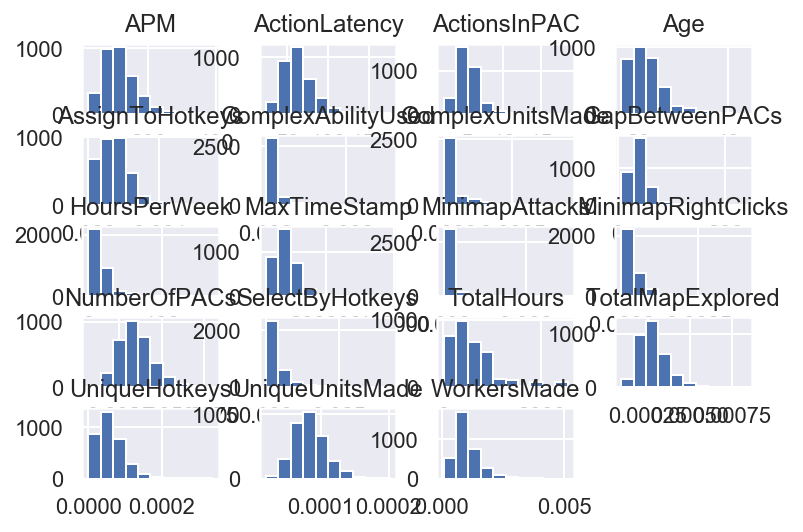

In [7]:
scns.drop(['LeagueIndex'], axis=1).hist()

In [7]:
scs_cov = np.cov(scs.drop('LeagueIndex', axis=1), rowvar=False)

In [8]:
X_col = scs.drop('LeagueIndex', axis=1).columns
scs_cov_df = pd.DataFrame(scs_cov, columns=X_col, index=X_col)

In [9]:
scs_cov_df

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
Age,1.000298,-0.164846,-0.036818,-0.190584,-0.113270,-0.095390,-0.002237,0.043147,-0.017298,-0.190566,0.110550,0.235404,-0.042323,-0.087450,-0.089196,-0.023881,-0.080693,-0.066089,0.041462
HoursPerWeek,-0.164846,1.000298,0.571825,0.370385,0.349404,0.274227,0.132130,0.163808,0.111232,0.251410,-0.187261,-0.249489,0.100735,0.079806,0.048156,0.033685,0.034052,0.066746,-0.010639
TotalHours,-0.036818,0.571825,1.000298,0.473814,0.418009,0.345670,0.177715,0.223989,0.167225,0.343715,-0.298684,-0.364648,0.131561,0.131718,0.132811,0.051829,0.054339,0.084234,-0.004777
APM,-0.190584,0.370385,0.473814,1.000298,0.840110,0.579117,0.319938,0.272073,0.322628,0.652453,-0.577007,-0.723154,0.383467,0.255678,0.351806,0.101758,0.140167,0.137960,-0.020276
SelectByHotkeys,-0.113270,0.349404,0.418009,0.840110,1.000298,0.507920,0.327360,0.202212,0.142962,0.401729,-0.305974,-0.416580,0.160802,0.206441,0.143524,0.110366,0.047958,0.067931,-0.083996
AssignToHotkeys,-0.095390,0.274227,0.345670,0.579117,0.507920,1.000298,0.343658,0.235116,0.192425,0.486655,-0.395786,-0.481693,0.091862,0.172889,0.185299,0.077323,0.146828,0.159166,0.001971
UniqueHotkeys,-0.002237,0.132130,0.177715,0.319938,0.327360,0.343658,1.000298,0.090142,0.078912,0.130419,-0.213498,-0.196285,0.145258,0.381203,0.127549,0.386876,-0.116391,-0.089098,-0.422787
MinimapAttacks,0.043147,0.163808,0.223989,0.272073,0.202212,0.235116,0.090142,1.000298,0.242189,0.172872,-0.234717,-0.196098,0.137215,0.031212,0.076174,-0.032496,0.038173,0.043648,0.090229
MinimapRightClicks,-0.017298,0.111232,0.167225,0.322628,0.142962,0.192425,0.078912,0.242189,1.000298,0.175878,-0.254749,-0.230269,0.307592,0.111244,0.204697,0.063136,0.093466,0.091413,0.056199
NumberOfPACs,-0.190566,0.251410,0.343715,0.652453,0.401729,0.486655,0.130419,0.172872,0.175878,1.000298,-0.506522,-0.819812,-0.233640,0.176664,0.278220,-0.058784,0.181876,0.171781,0.212180


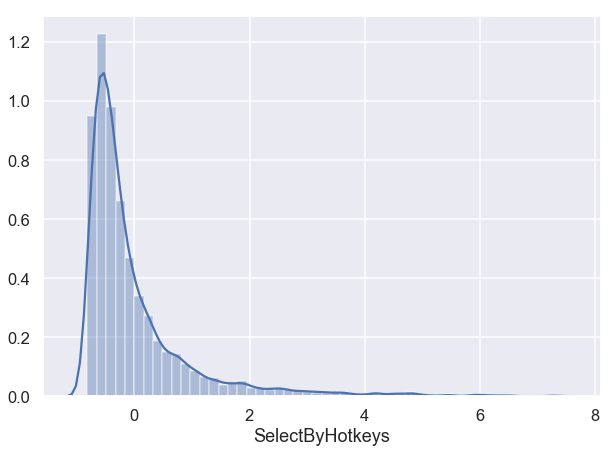

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(scs.SelectByHotkeys)

## Evaluate Feature Normality

### Histograms

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


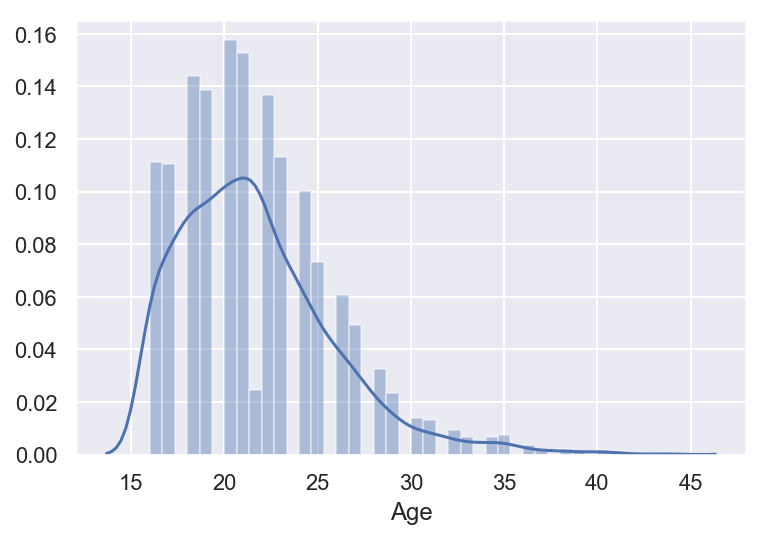

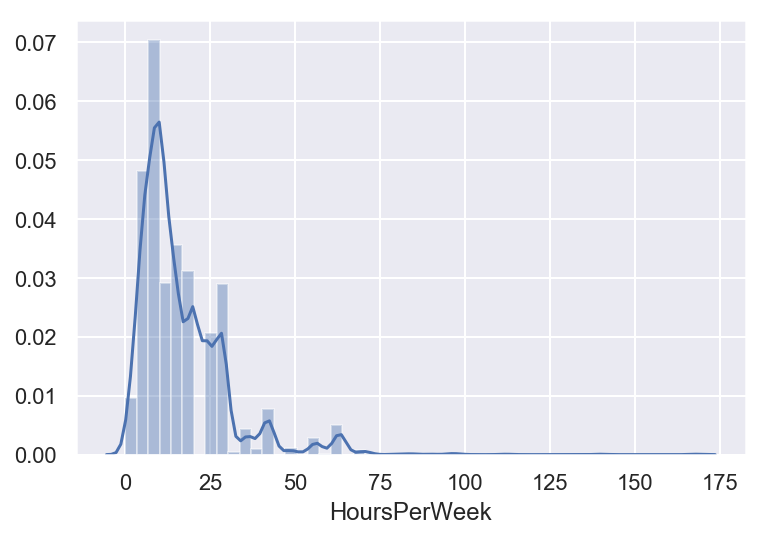

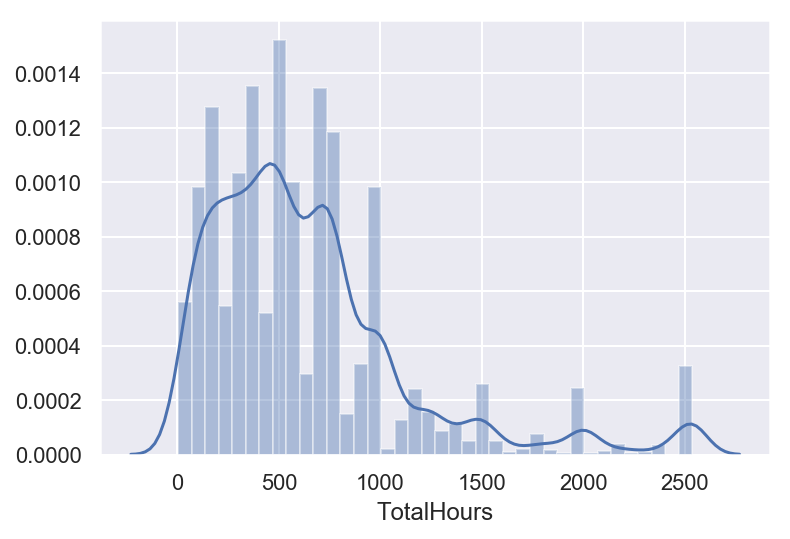

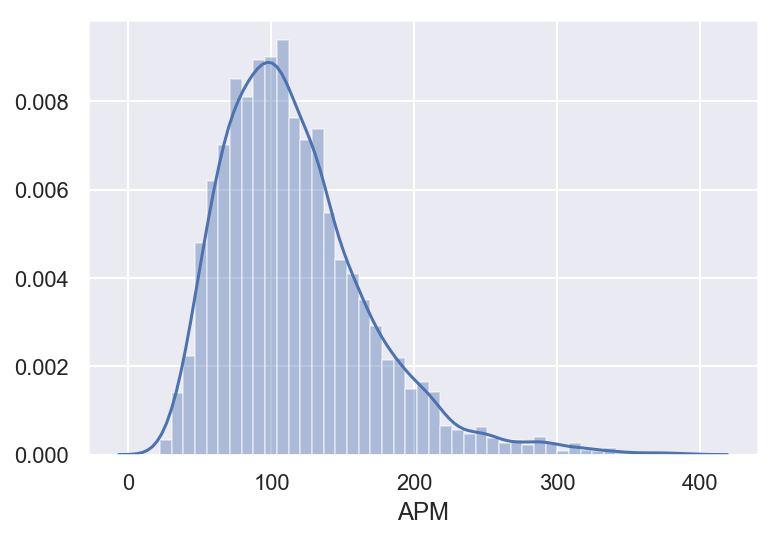

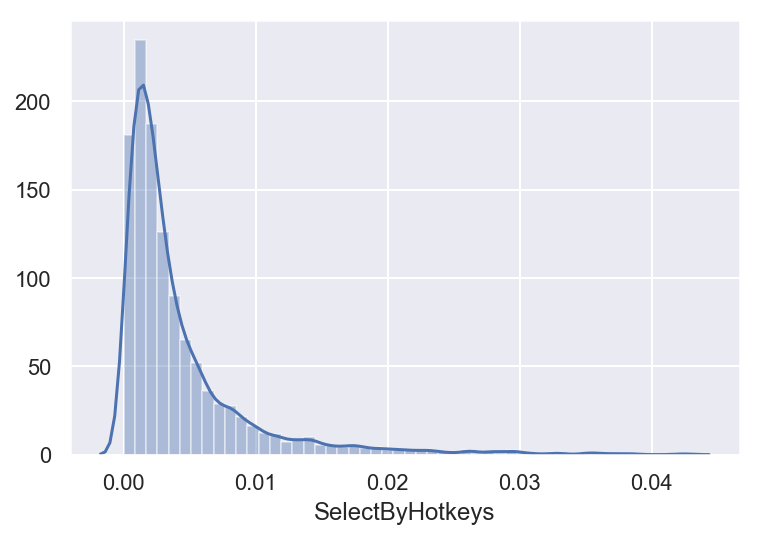

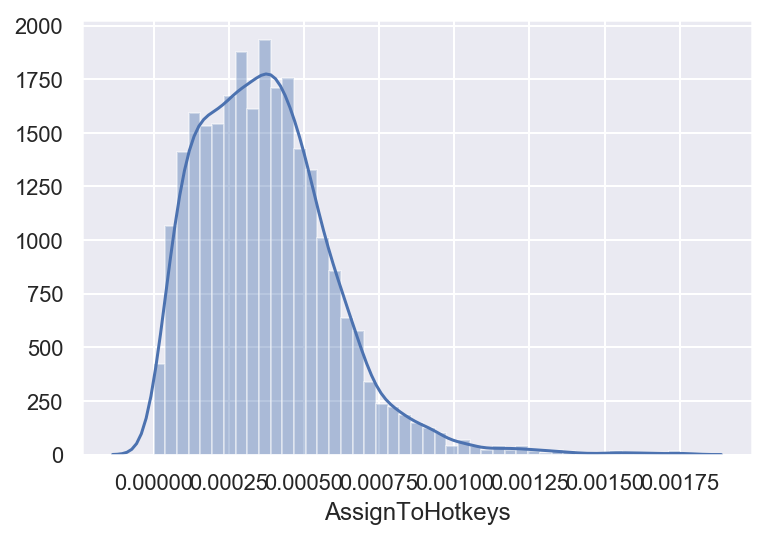

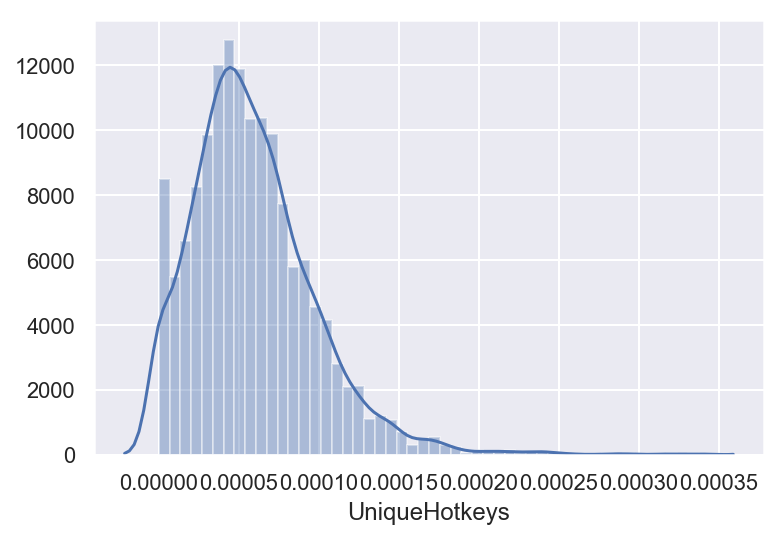

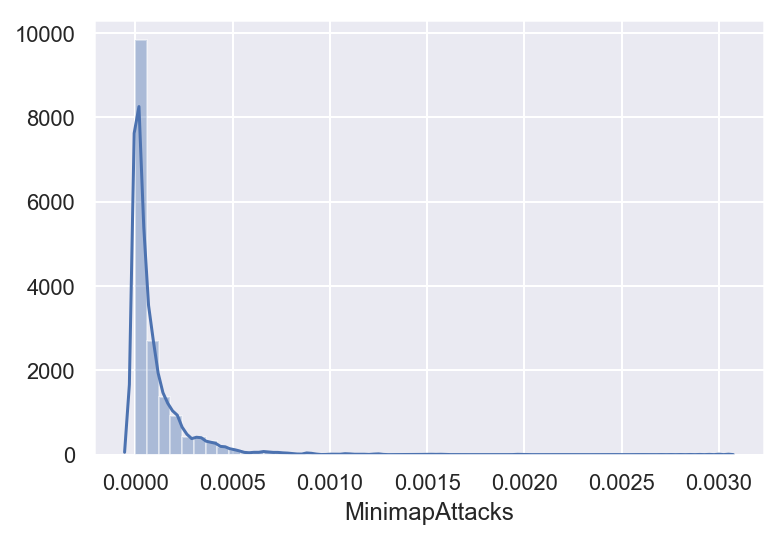

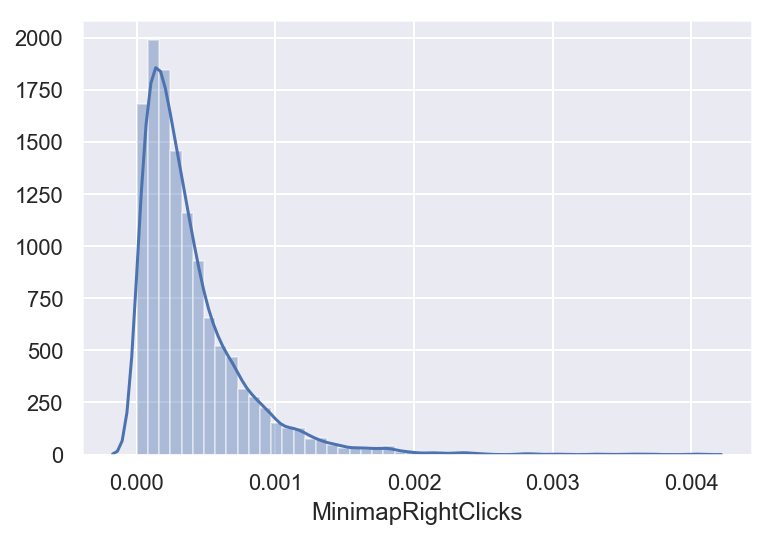

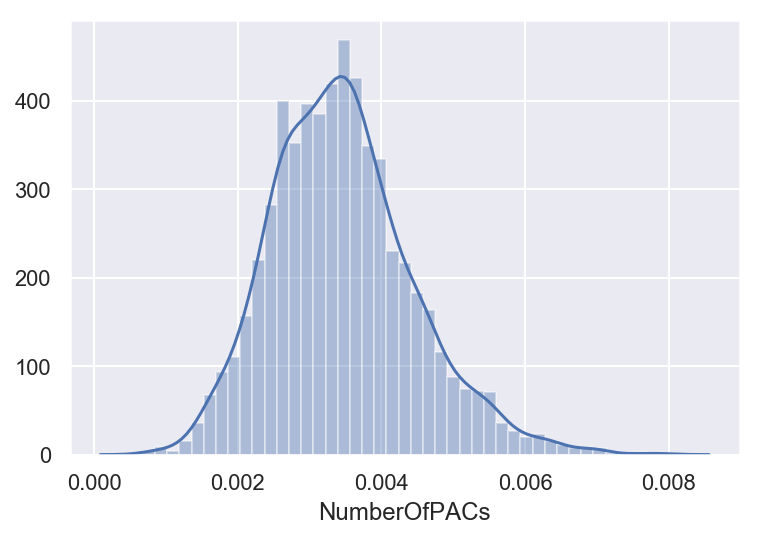

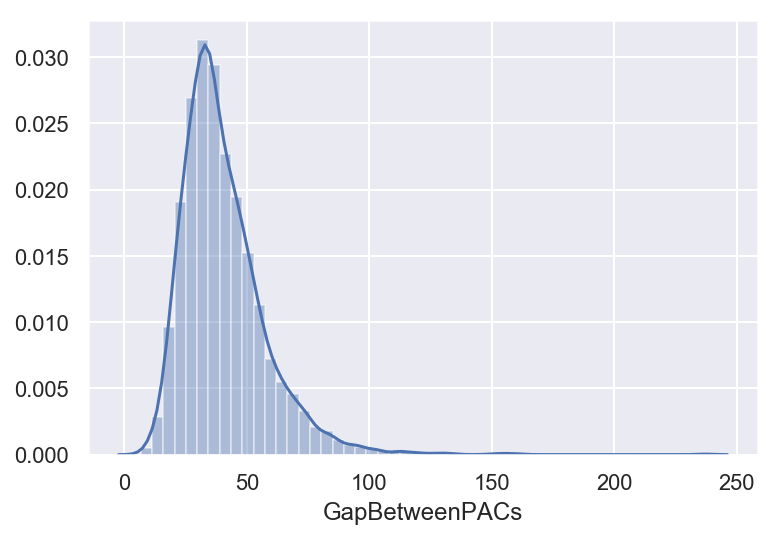

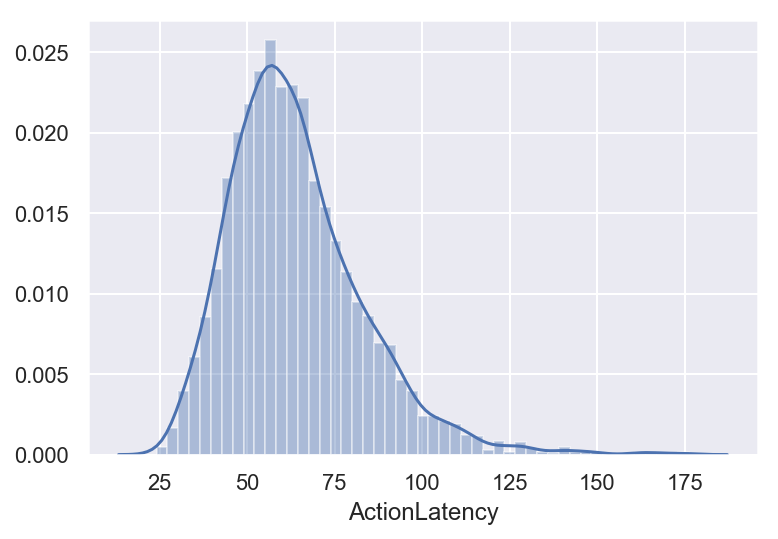

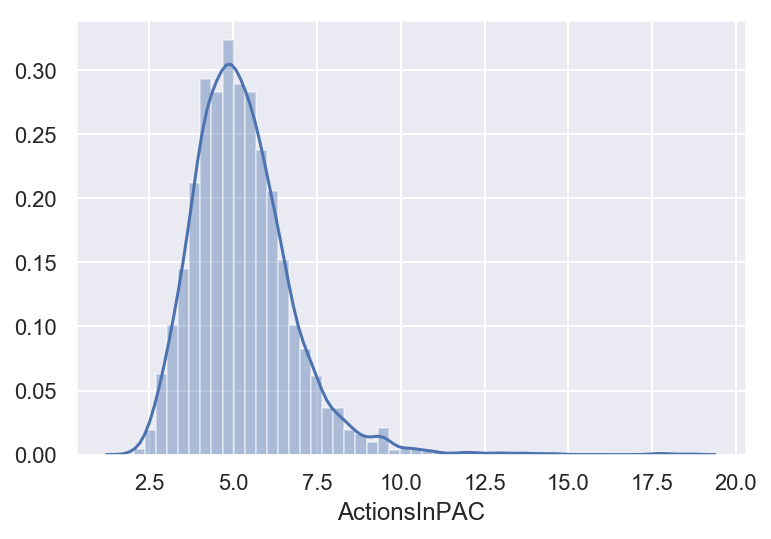

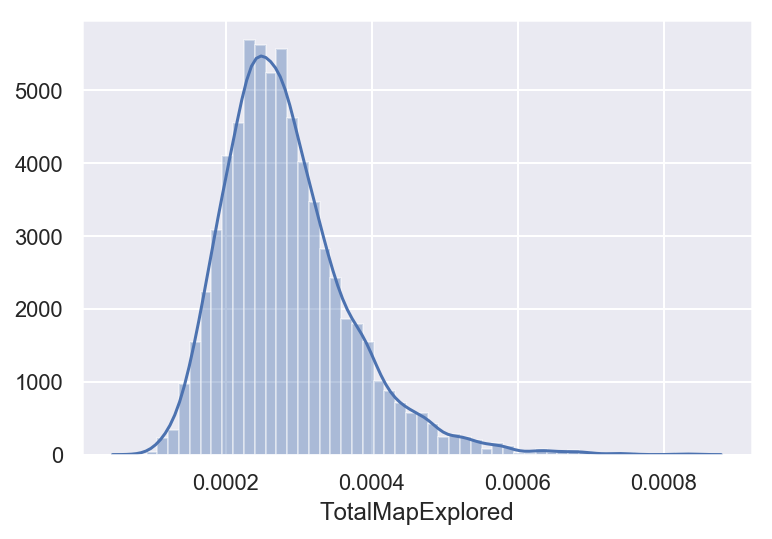

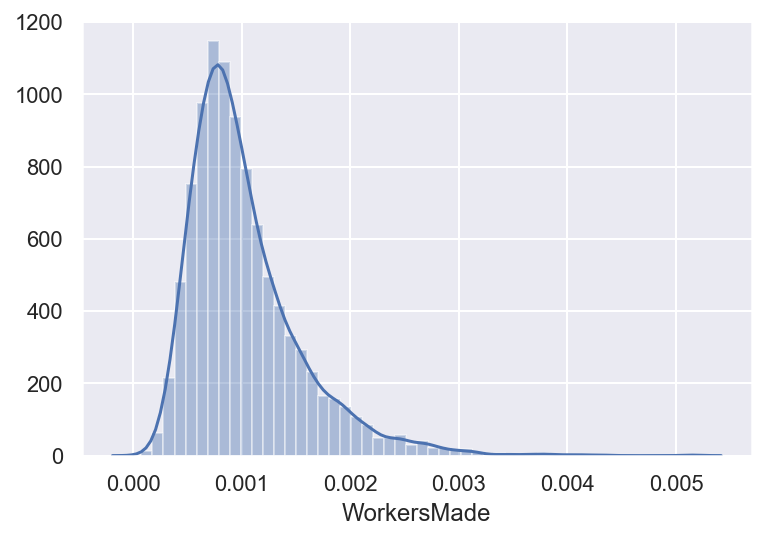

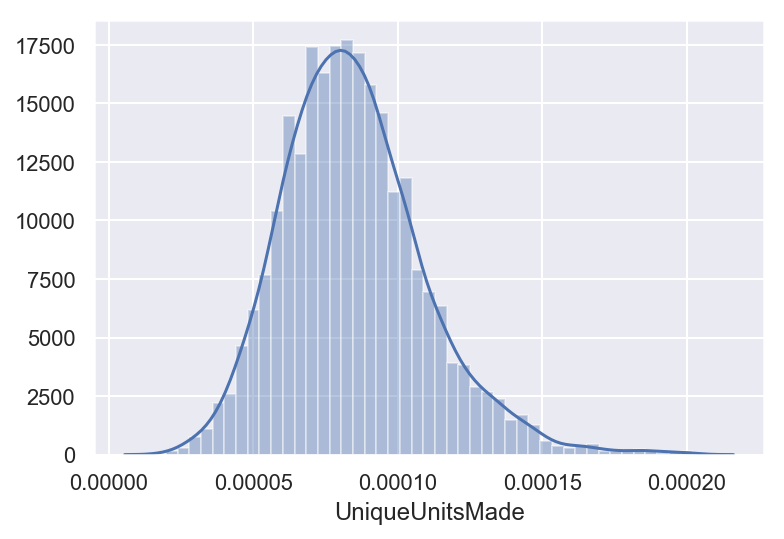

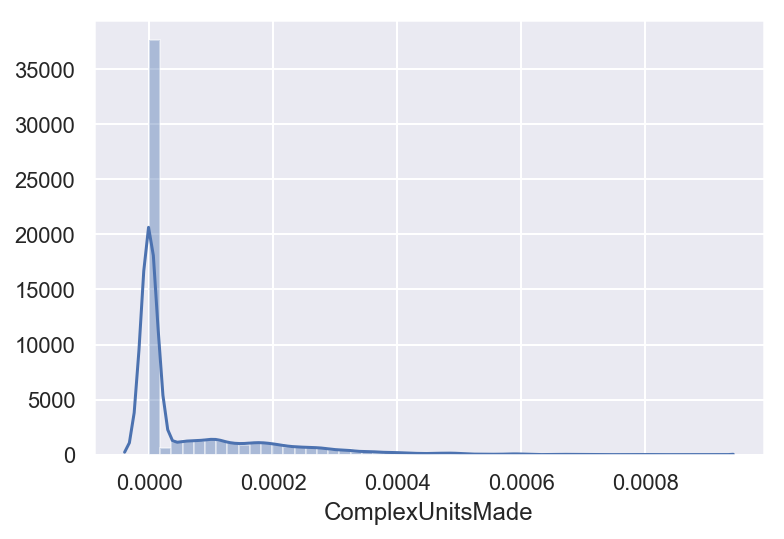

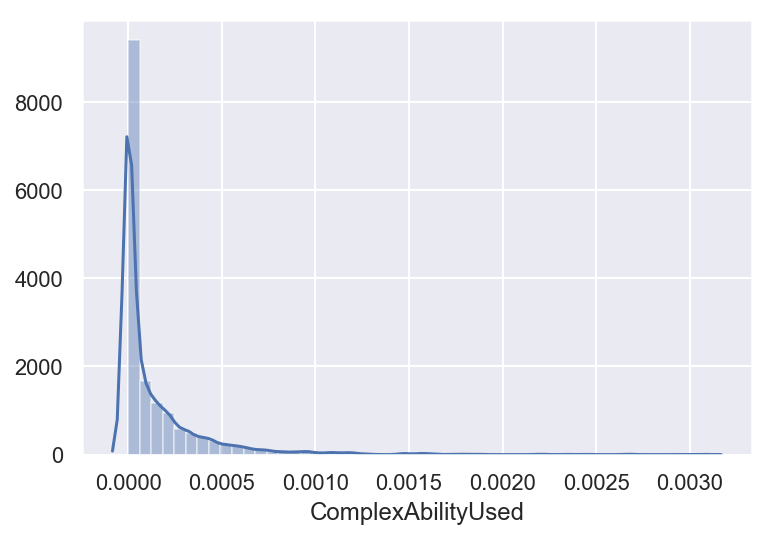

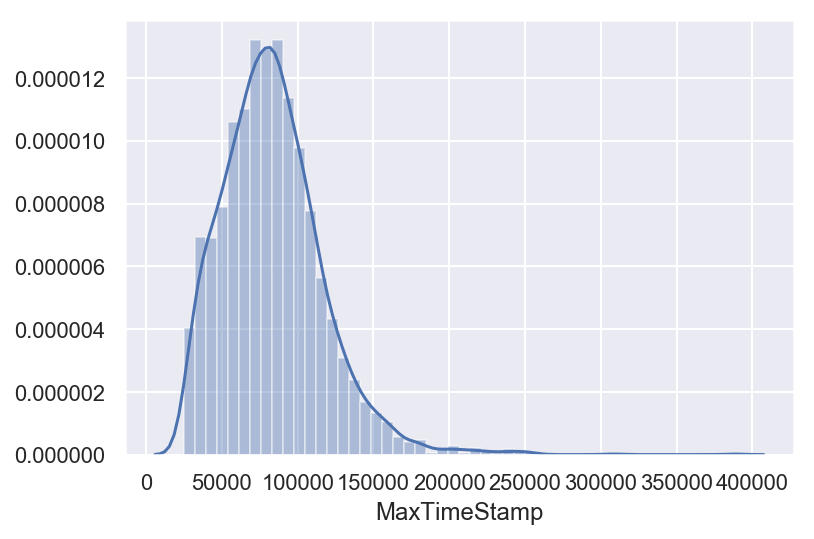

In [11]:
for h in scns.drop('LeagueIndex', axis=1).columns:
    sns.distplot(scns[h])
    plt.show()
    

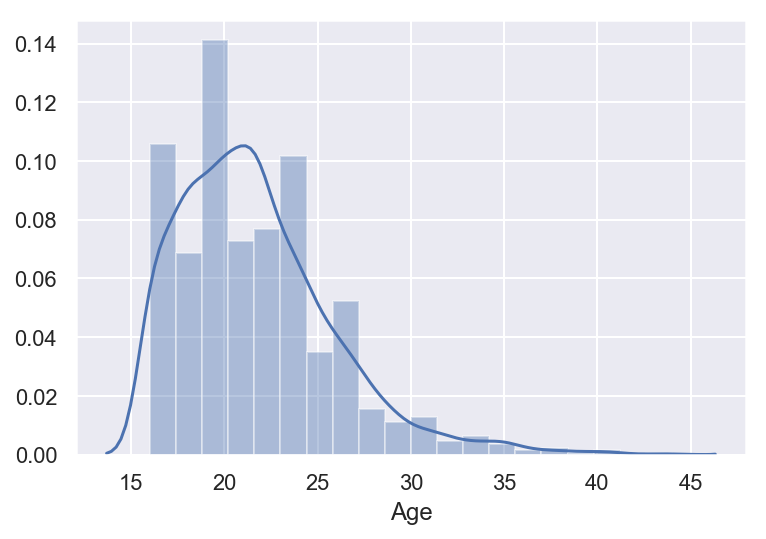

In [12]:
# Just changing bins makes things more normal
sns.distplot(scns.Age, bins=20)
plt.show()

__Box-Cox Transforms__
- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [13]:
# Let's try some transforms with Box-Cox
from scipy.stats import boxcox
values = [-1.0, -0.5, 0.0, 0.5, 1.0]
transforms = ['Reciprocal Transform', 'Reciprocal Square Root',
             'Log Transform', 'Square Root Transform', 'No Transform']
lambdas = list(zip(values, transforms))

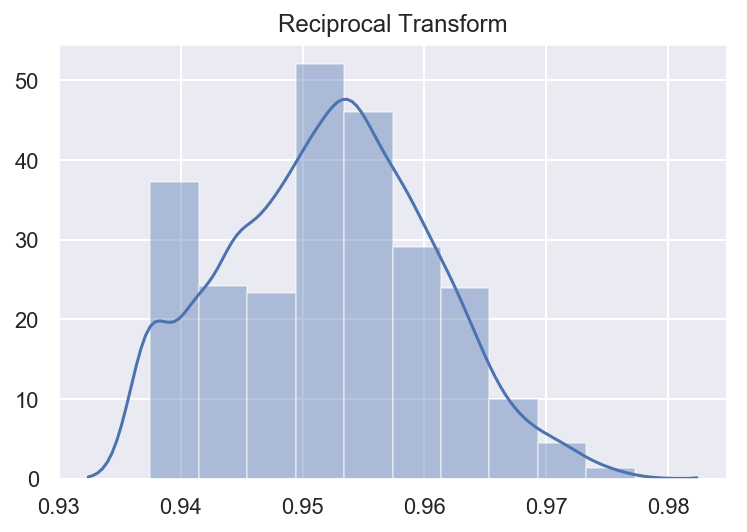

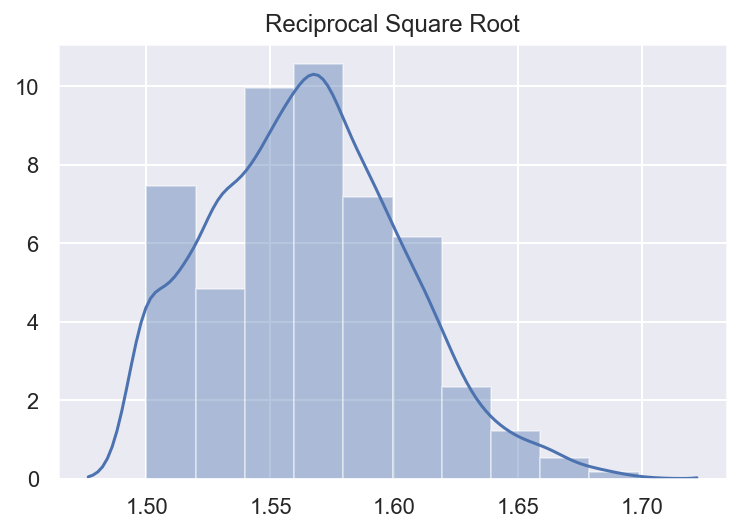

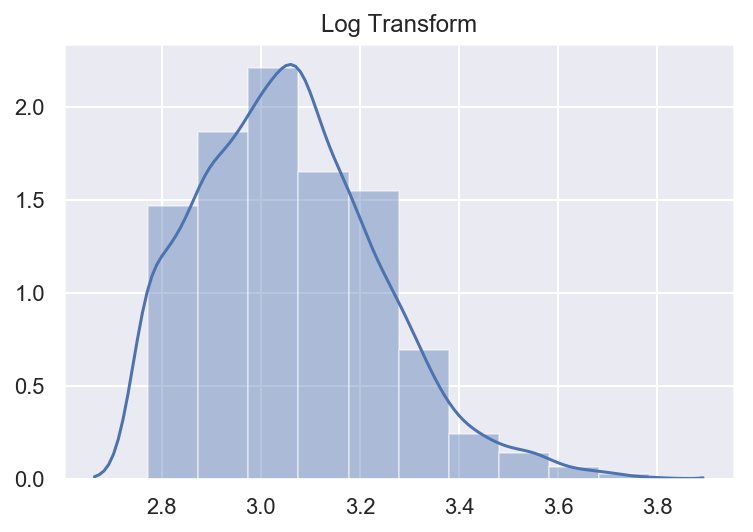

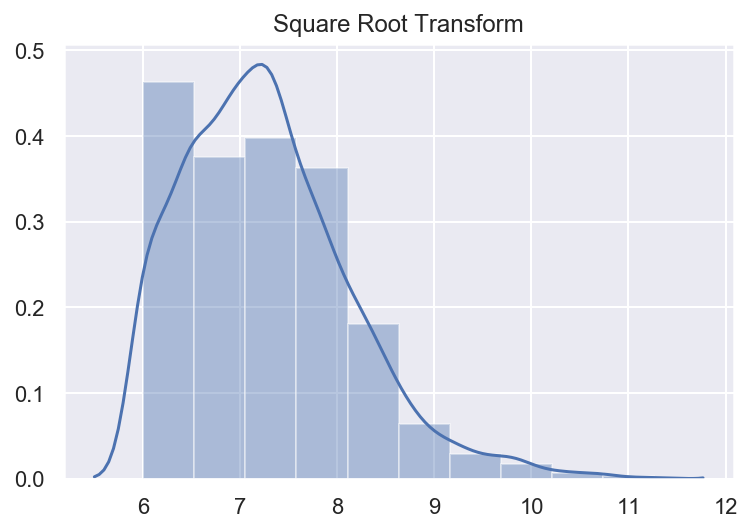

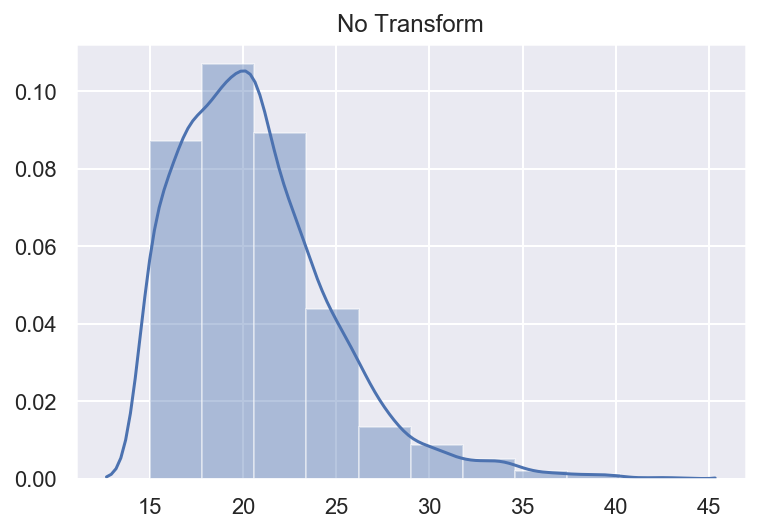

In [14]:
for value, trans in lambdas:
    data = boxcox(scns.Age, value)
    ax = sns.distplot(data, bins=10)
    ax.set(title=trans)
    plt.show()

- The log transform brings it closest to "normality" but there is definitely still a right skew. 
- Not surprising, as you would expect more younger players in SC. 

### Q-Q Plots

Age


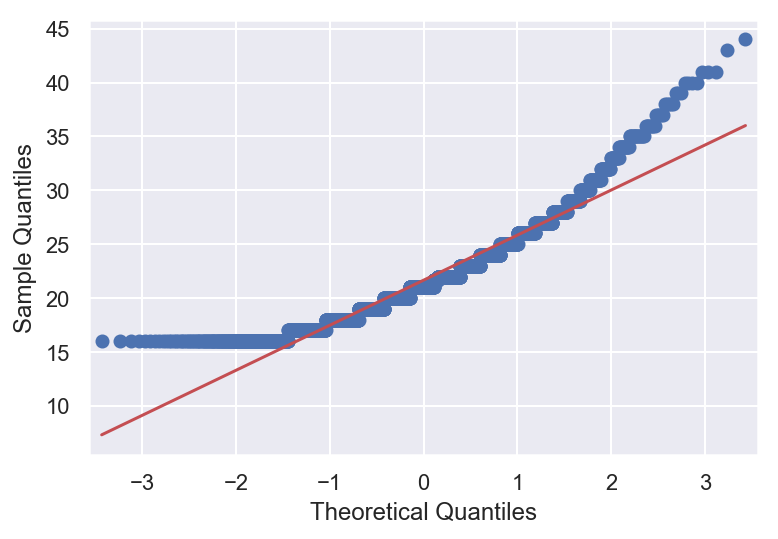

HoursPerWeek


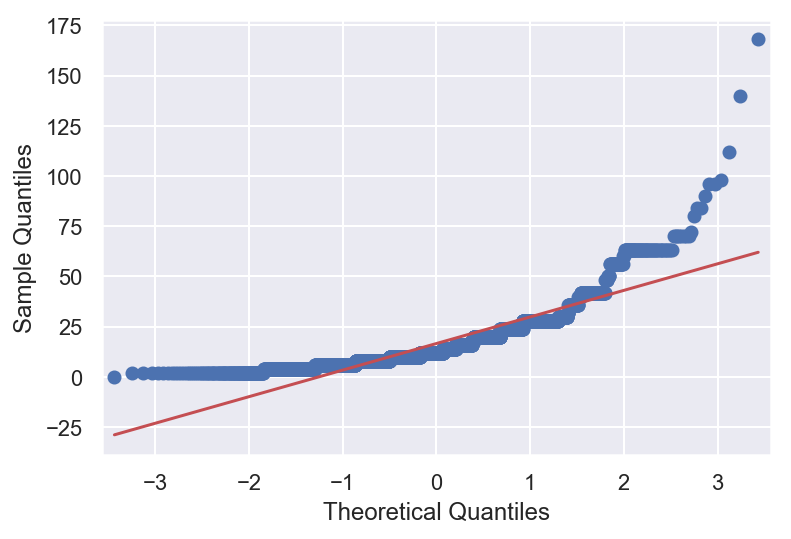

TotalHours


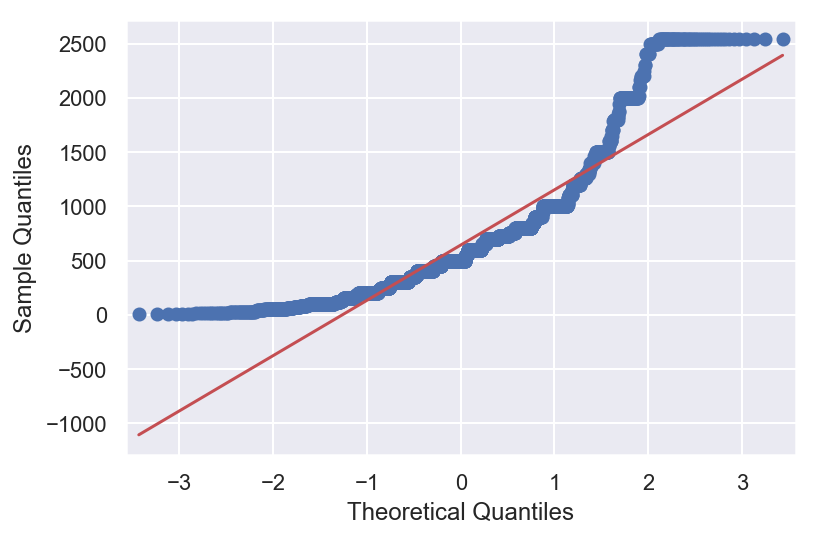

APM


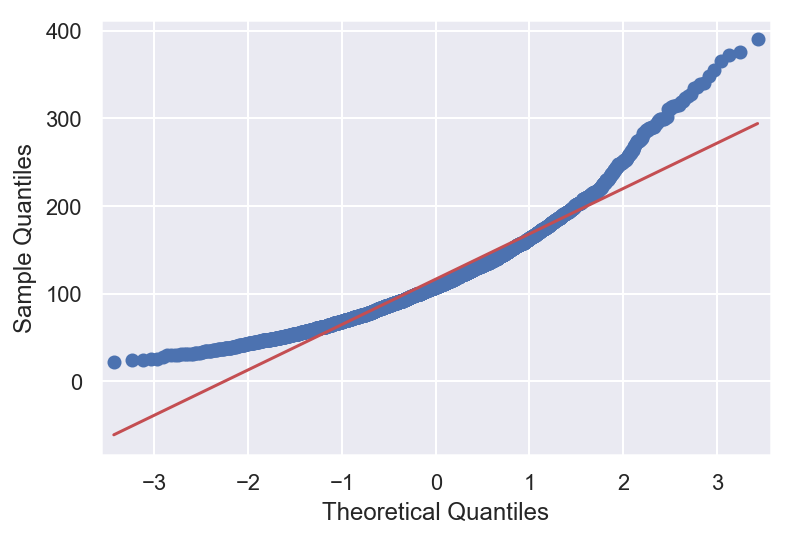

SelectByHotkeys


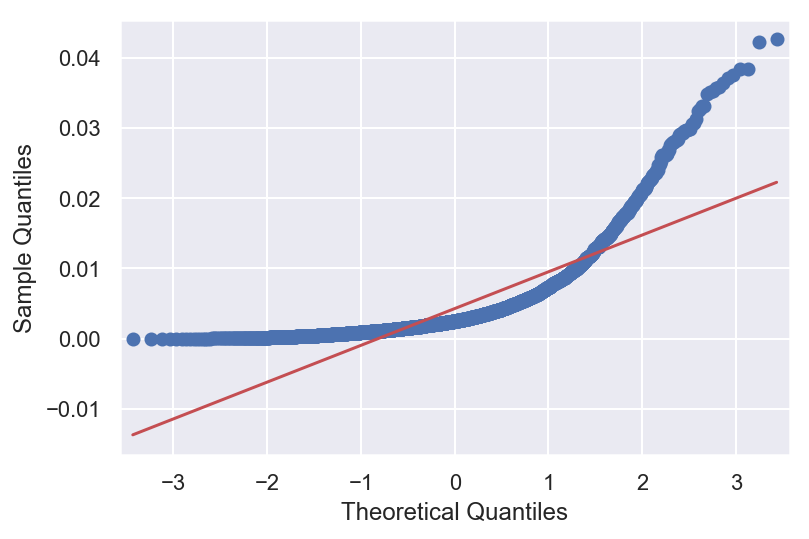

AssignToHotkeys


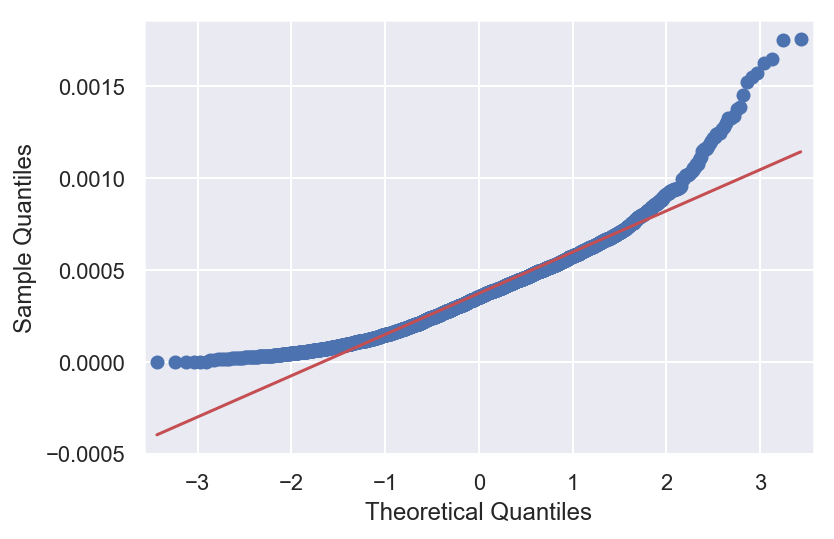

UniqueHotkeys


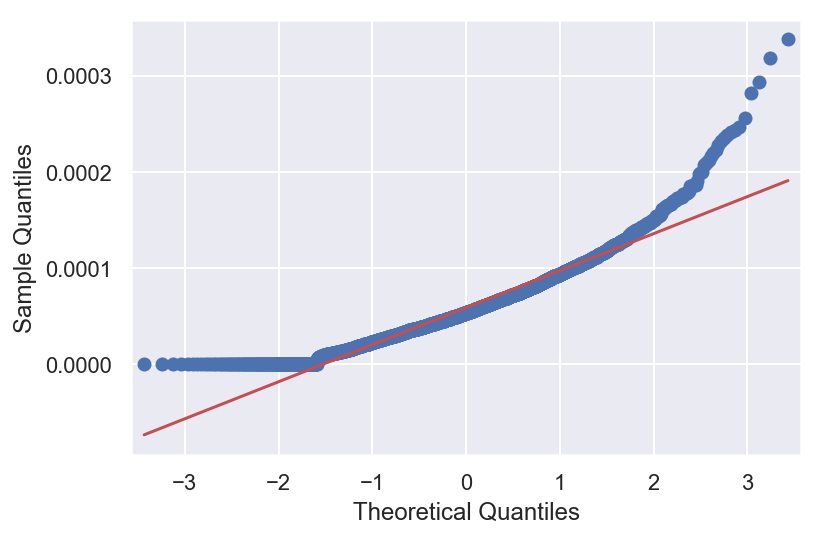

MinimapAttacks


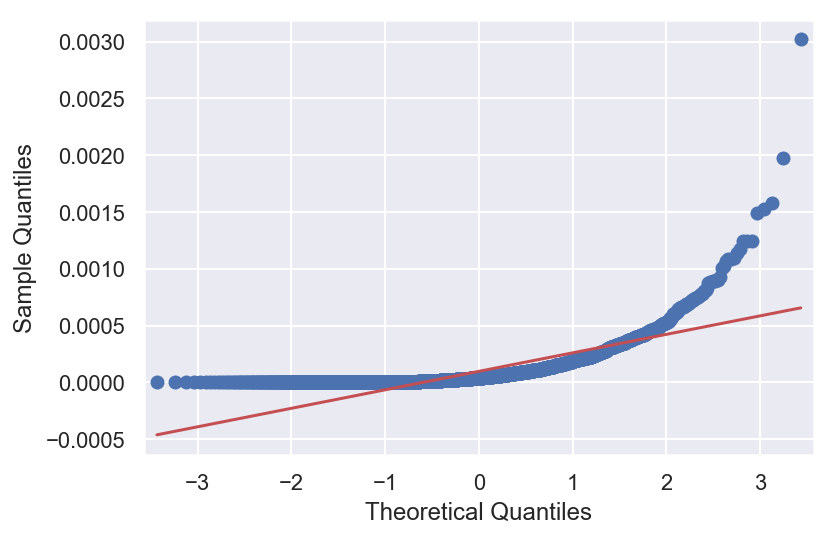

MinimapRightClicks


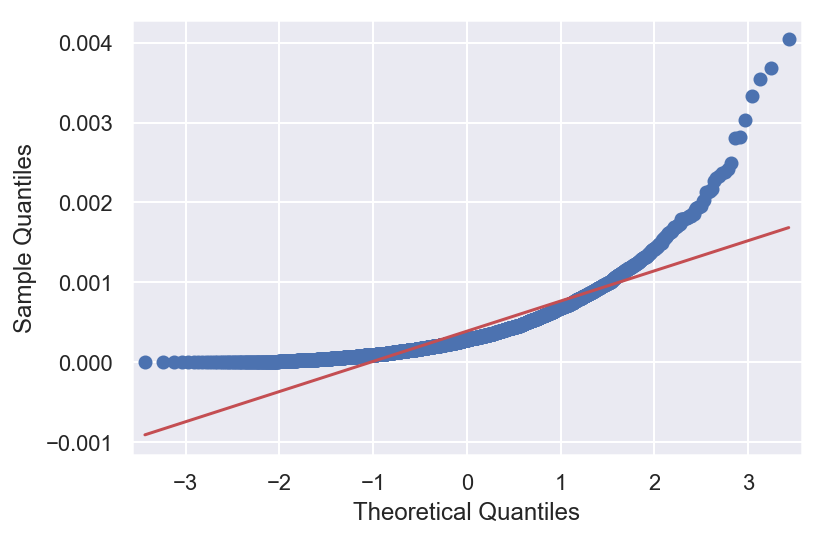

NumberOfPACs


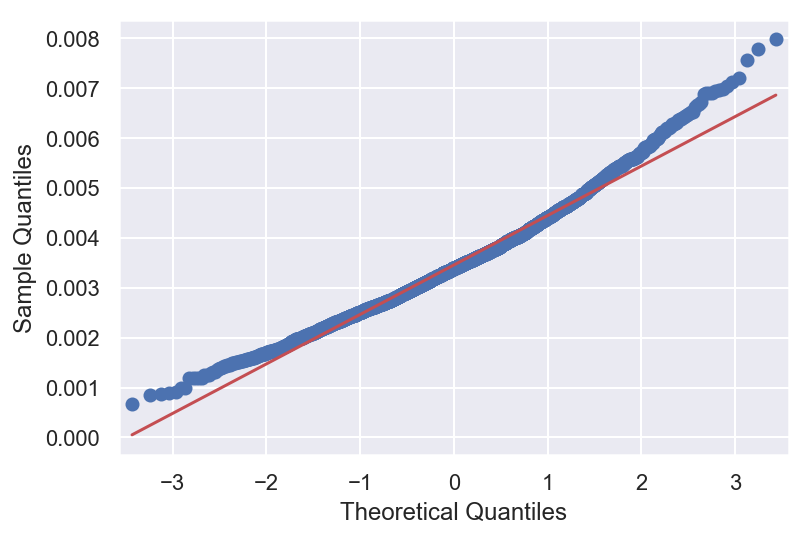

GapBetweenPACs


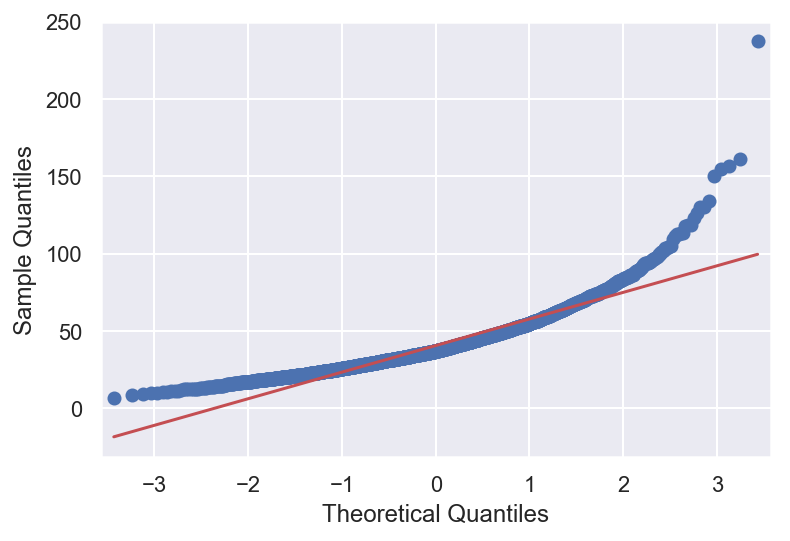

ActionLatency


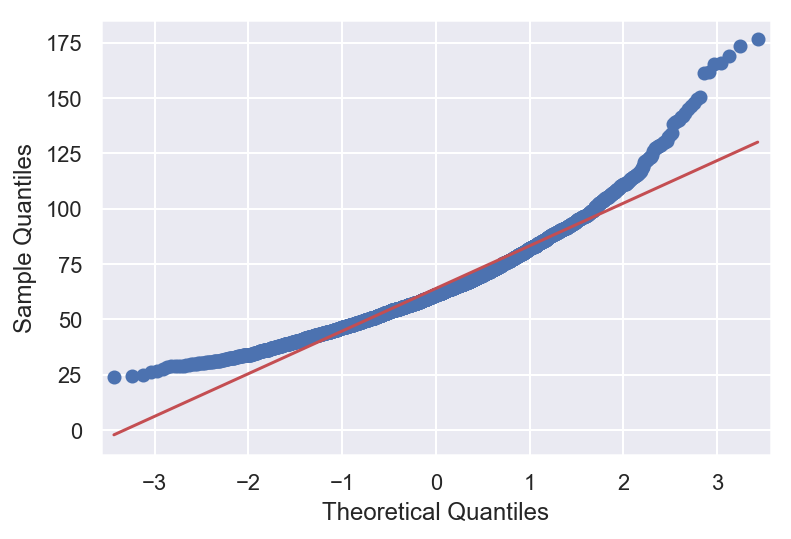

ActionsInPAC


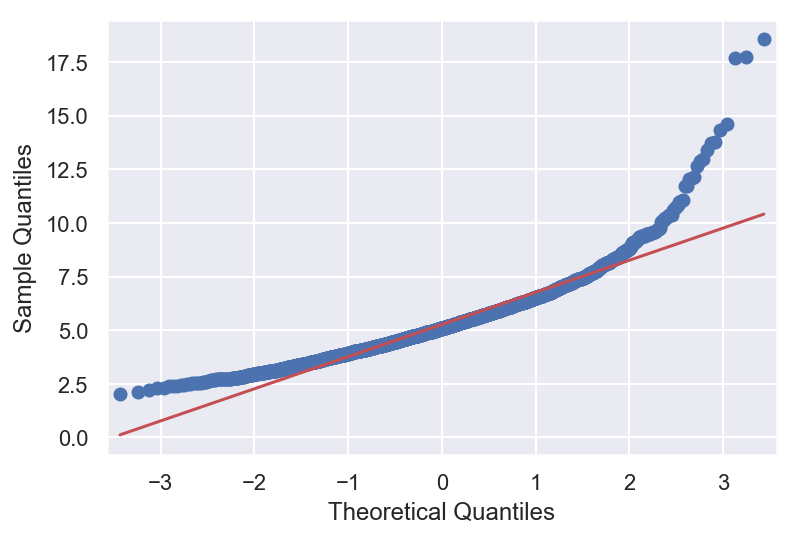

TotalMapExplored


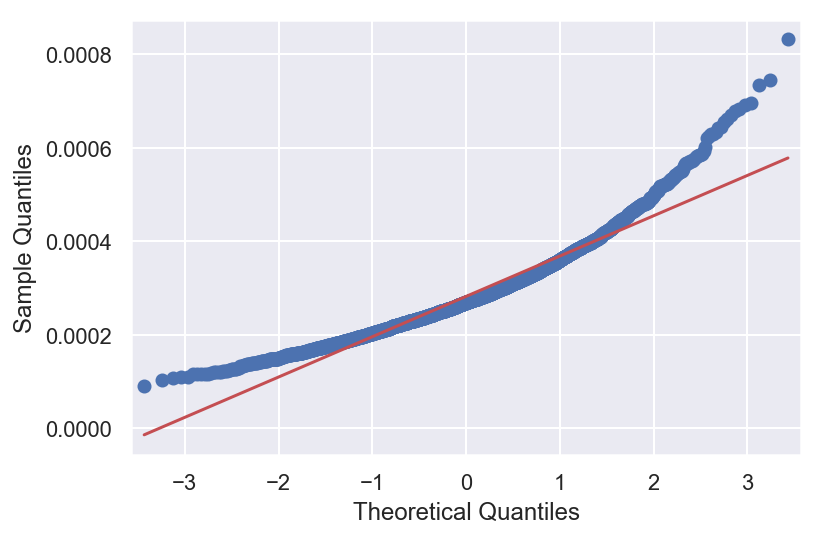

WorkersMade


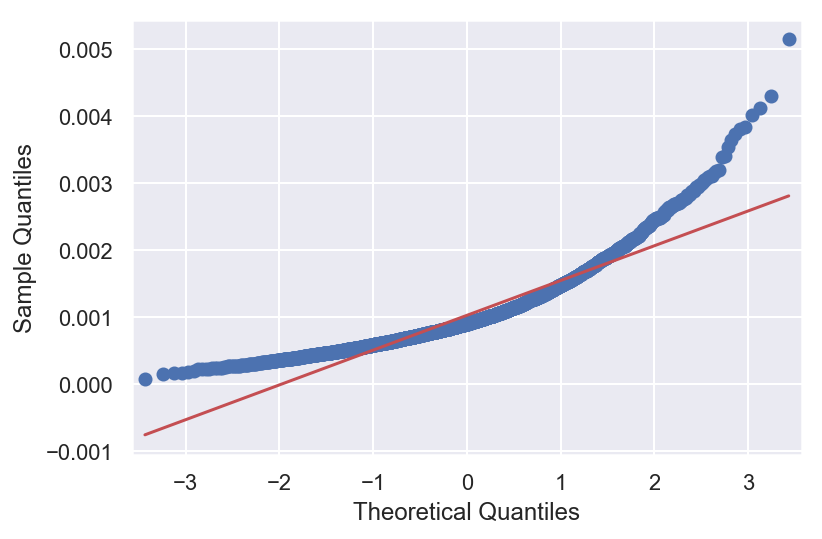

UniqueUnitsMade


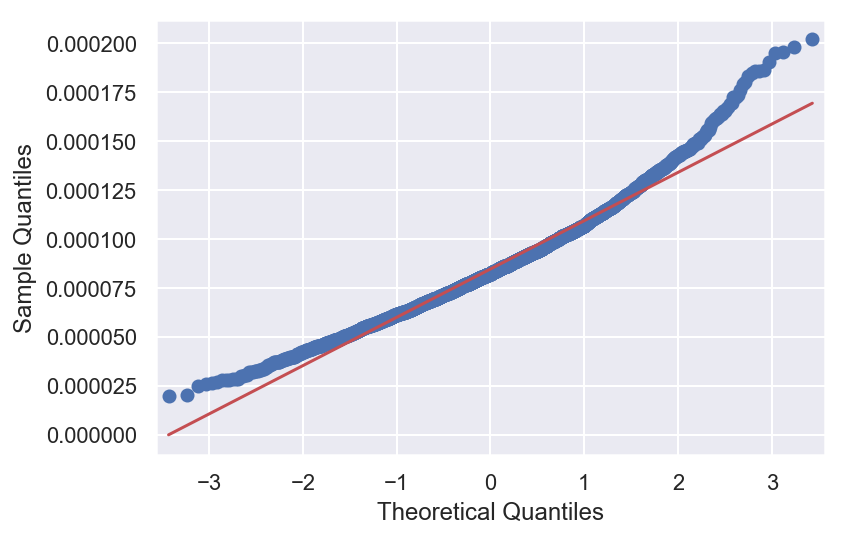

ComplexUnitsMade


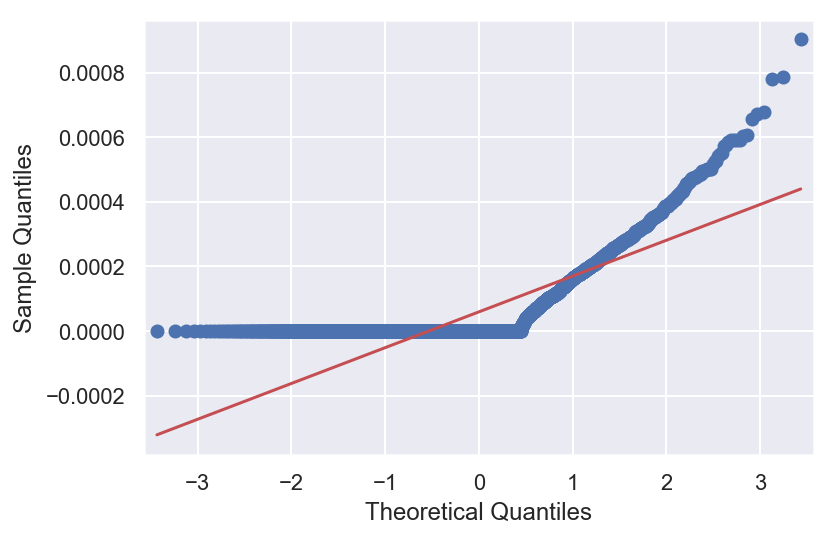

ComplexAbilityUsed


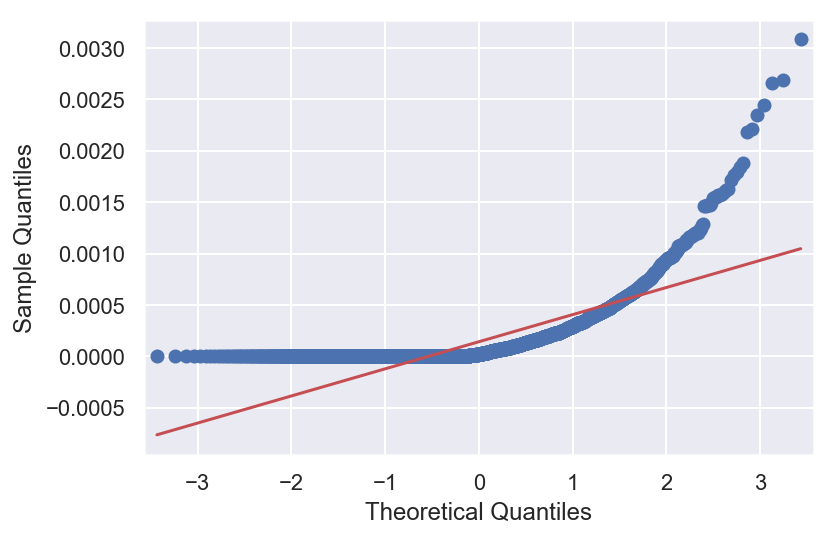

MaxTimeStamp


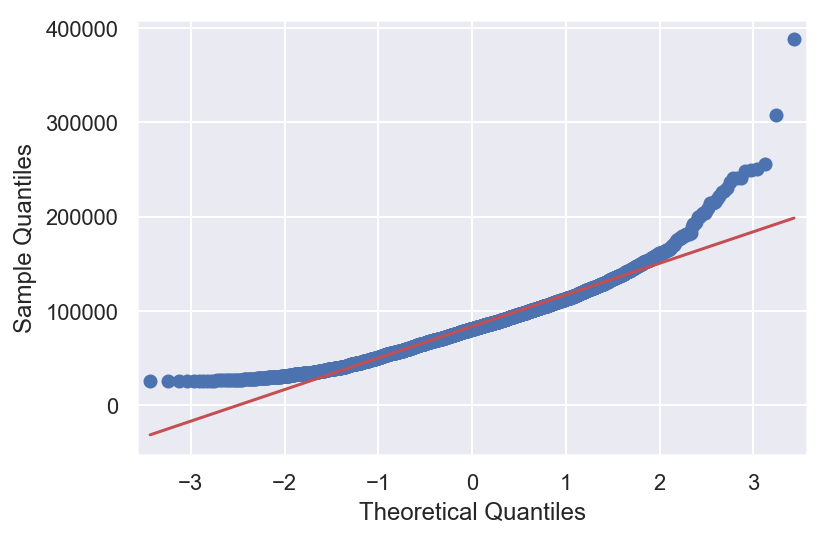

In [15]:
from statsmodels.graphics.gofplots import qqplot
for h in scns.drop('LeagueIndex', axis=1).columns:
    print(h)
    qqplot(scns[h], line='s')
    plt.show()
    

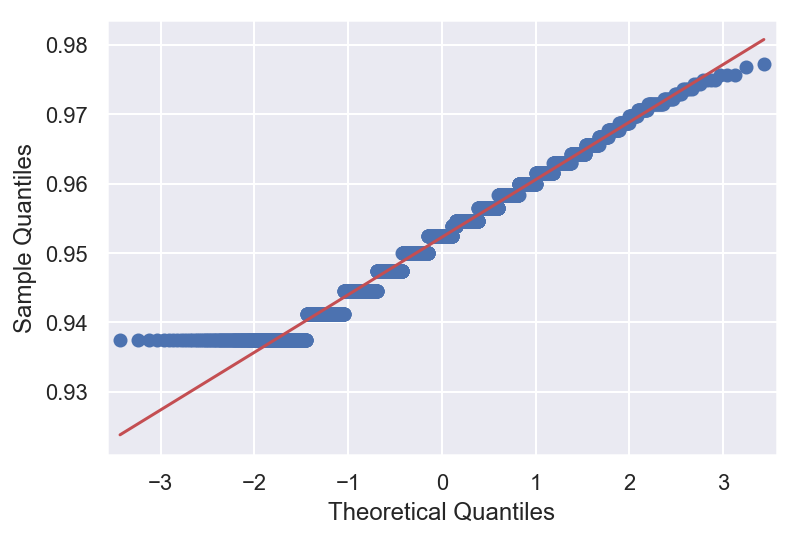

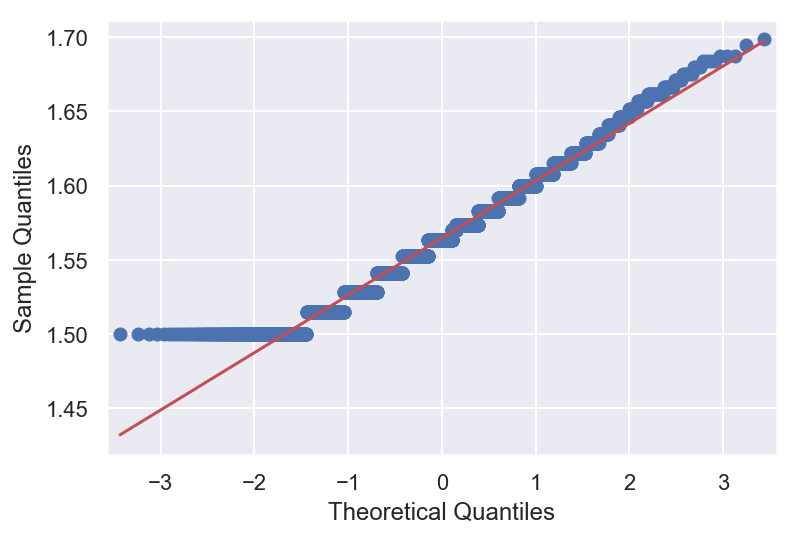

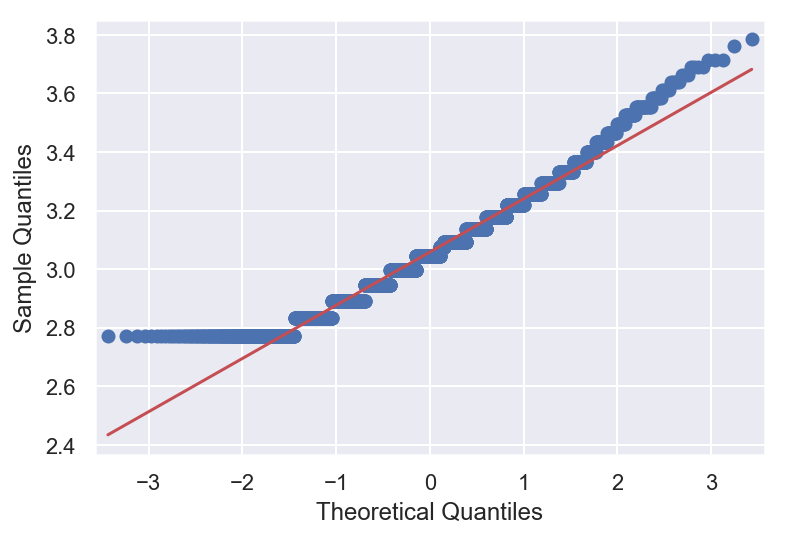

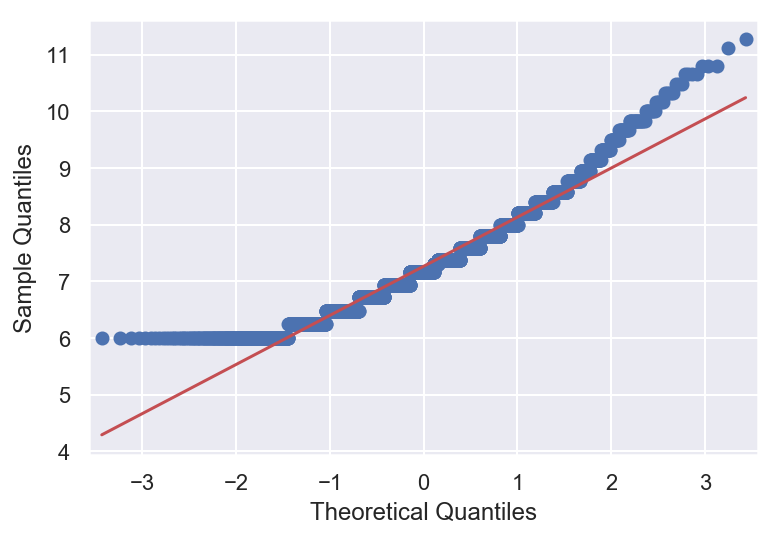

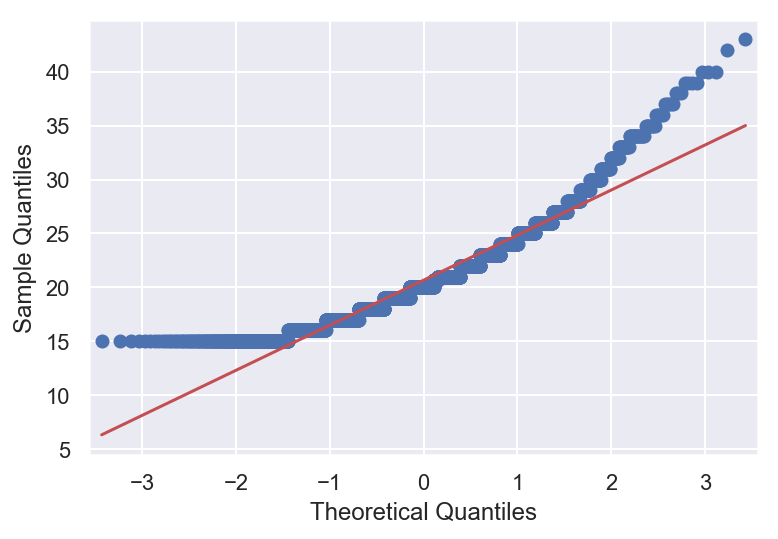

In [16]:
# Let's try various transforms of Age on the Q-Q Plot
for value, trans in lambdas:
    data = boxcox(scns.Age, value)
    qqplot(data,line='s')
    plt.show()

- All of these tests indicate that Age is not normal, even with the various Box-Cox transforms.
- Let's look at statistical tests for more rigor. 

## Statistical Tests of Normality

### Shapiro-Wilk Test
- Believed to be a good general test for normality, but some suggestion that it is more suitable for smaller datasets in the 1000s.
- This dataset is less than 4000, so it should be good regardless.

In [17]:
from scipy.stats import shapiro
for value, trans in lambdas:
    stat, p = shapiro(boxcox(scns.Age, value))
    print(trans, "test result:")
    print('W-Statistic=%.4f, p=%.4f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Age looks Gaussian (fail to reject H0)")
    else:
        print("Age doesn't look Gaussian (reject H0)")
    print()
    

Reciprocal Transform test result:
W-Statistic=0.9802, p=0.0000
Age doesn't look Gaussian (reject H0)

Reciprocal Square Root test result:
W-Statistic=0.9769, p=0.0000
Age doesn't look Gaussian (reject H0)

Log Transform test result:
W-Statistic=0.9666, p=0.0000
Age doesn't look Gaussian (reject H0)

Square Root Transform test result:
W-Statistic=0.9485, p=0.0000
Age doesn't look Gaussian (reject H0)

No Transform test result:
W-Statistic=0.9219, p=0.0000
Age doesn't look Gaussian (reject H0)



- This seems to be pretty conclusive proof that Age is NOT Gaussian. 
- We'll look at other normality tests for coverage. 

### D'Agostino's K2 Test
- Calculates summary statistics like kurtosis and skewnesss to determine normality. 

In [18]:
from scipy.stats import normaltest
for value, trans in lambdas:
    stat, p = normaltest(boxcox(scns.Age, value))
    print(trans, "test result:")
    print('Statistic=%.4f, p=%.4f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Age looks Gaussian (fail to reject H0)")
    else:
        print("Age doesn't look Gaussian (reject H0)")
    print()

Reciprocal Transform test result:
Statistic=61.6640, p=0.0000
Age doesn't look Gaussian (reject H0)

Reciprocal Square Root test result:
Statistic=62.6302, p=0.0000
Age doesn't look Gaussian (reject H0)

Log Transform test result:
Statistic=164.2001, p=0.0000
Age doesn't look Gaussian (reject H0)

Square Root Transform test result:
Statistic=371.9571, p=0.0000
Age doesn't look Gaussian (reject H0)

No Transform test result:
Statistic=663.2017, p=0.0000
Age doesn't look Gaussian (reject H0)



- Again distinctly not normal. Let's try another.

### Anderson-Darling Test
- Tests whether a data sample comes from one of among many known data samples.
- Returns a list of critical values rather than a single p-value, for a more thorough test.
- Defaults to the Gaussian (dist='norm'), but other distributions can be tested. 

In [19]:
from scipy.stats import anderson
for value, trans in lambdas:
    result = anderson(boxcox(scns.Age, value))
    print(trans, "test:")
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print("%.3f: %.3f, data looks normal (fail to reject H0)" % (sl, cv))
        else:
            print("%.3f: %.3f, data does NOT look normal (reject H0)" % (sl, cv))
        

Reciprocal Transform test:
Statistic: 15.742
15.000: 0.575, data does NOT look normal (reject H0)
10.000: 0.655, data does NOT look normal (reject H0)
5.000: 0.786, data does NOT look normal (reject H0)
2.500: 0.917, data does NOT look normal (reject H0)
1.000: 1.091, data does NOT look normal (reject H0)
Reciprocal Square Root test:
Statistic: 16.321
15.000: 0.575, data does NOT look normal (reject H0)
10.000: 0.655, data does NOT look normal (reject H0)
5.000: 0.786, data does NOT look normal (reject H0)
2.500: 0.917, data does NOT look normal (reject H0)
1.000: 1.091, data does NOT look normal (reject H0)
Log Transform test:
Statistic: 22.219
15.000: 0.575, data does NOT look normal (reject H0)
10.000: 0.655, data does NOT look normal (reject H0)
5.000: 0.786, data does NOT look normal (reject H0)
2.500: 0.917, data does NOT look normal (reject H0)
1.000: 1.091, data does NOT look normal (reject H0)
Square Root Transform test:
Statistic: 33.947
15.000: 0.575, data does NOT look norm

### Normality test conclusions on the Age feature
- The Age feature is definitely NOT normal. This was a valuable test in that we gradually moved from the hazier graphical tests to the more rigoroust statistics-based tests.
- The data looked significantly skewed in the histograms, even more so in the Q-Q plot, and finally conclusively not normal in all of the statistical tests.
- Now let's come up with an automated test for all of the other features to see where we are. 

## Automate Normality Evaluation of All Features

- We'll use the __Shapiro-Wilk__ normality test since it should work fine for the size of our data set. 
- We'll use __Box-Cox__ to iterate through the various transforms, since it does not require values to be positive, using sklearn's PowerTransformer. 

In [20]:
# Unfortunately this requires no zeroes or negative values... Will save for another day...

from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer


def normal_test_bc(df):
    """
    Function to test for normality (Gaussian) on all but the first column in a dataframe.
    Uses the Shapiro-Wilk normality test. 
    Iterates through Box-Cox transformation of the data for a thorough examination of the data.
    Input - DataFrame
    Returns - DataFrame of normality test results
    """
    # Constant values
    data = df.drop(df.columns[0], axis=1) # Drop first column of dataframe, assuming that is column of the target
    lambdas = [1.0, -1.0, -0.5, 0.0, 0.5] # Box-Cox lambda values
    results_columns = ['NT_Stats', 'NT_Results', 'RT_Stats', 'RT_Result', 'RSR_Stats', 'RSR_Result',
             'LS_Stats', 'LT_Result', 'SRT_Stats', 'SRT_Results'] # Results df columns
    alpha = 0.05 # Alpha value for stats tests
    normal_test_df = pd.DataFrame(columns=results_columns) # Empty dataframe with needed columns
    
    # Outer loop to loop through features   
    for feature in data.columns:  # Loop through features
        
        # Inner loop to loop through box-cox transformations of each feature and the results 
        results_list = [] # Empty results list to append data to and transform into Series
        
        # Loop through lambda values
        for i in lambdas: 
            box_cox_values = boxcox(data[feature], i) # Get box-cox transformation values according to each lambda
            stat, p = shapiro(box_cox_values) # Capture stat and p-value of Shapiro-Wilks test
        
            # Append (stats, p-values) and pass/fail results to list
            results_list.append((stat,p))
            # Append Pass/Fail depending on p > alpha
            if p > alpha:
                results_list.append('Pass')
            else:
                results_list.append('Fail')  
                       
        # Change results_list into series
        results_series = pd.Series(results_list, index=results_columns, name=feature)
        
        # Append series to data frame 
        normal_test_df = normal_test_df.append(results_series, ignore_index=True)
        
    # Return data frame
    return normal_test_df
    


### Using PowerTransformer
- We'll use the __Shapiro-Wilk__ normality test since it should work fine for the size of our data set. 
- We'll use __Yeo-Johnson__ to iterate through the various transforms, since it does not require values to be positive, using sklearn's PowerTransformer. 
- Example here: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split


def normal_test_yj(df):
    """
    Function to test for normality (Gaussian) on all but the first column in a dataframe.
    Uses the Shapiro-Wilk normality test. 
    Iterates through Box-Cox transformation of the data for a thorough examination of the data.
    Input - DataFrame
    Returns - DataFrame of normality test results
    """
    # Constant values
    data = df.drop(df.columns[0], axis=1) # Drop first column of dataframe, assuming that is column of the target
    results_columns = ['YJ_Stats', 'YJ_Results'] # Results df columns
    alpha = 0.05 # Alpha value for stats tests
    normal_test_df = pd.DataFrame(columns=results_columns) # Empty dataframe with needed columns

    
    # Outer loop to loop through features   
    for feature in data.columns:  # Loop through features
        
        # Inner loop to loop through box-cox transformations of each feature and the results 
        results_list = [] # Empty results list to append data to and transform into Series
        
        # Apply yeo-johnson lambdas to data
        yj = PowerTransformer(method='yeo-johnson')
        yj.fit(np.array(data[feature]).reshape(-1,1))
        yj_value = yj.transform(np.array(data[feature]).reshape(-1,1)) # Get yj transformation on feature
        stat, p = shapiro(yj_value) # Capture stat and p-value of Shapiro-Wilks test
        

        # Append Pass/Fail depending on p > alpha
        if p > alpha:
            results_list.append('Pass')
        else:
            results_list.append('Fail')  
            
        # Append (stats, p-values) and pass/fail results to list
        results_list.append((stat,p))
                       
        # Change results_list into series
        results_series = pd.Series(results_list, index=results_columns, name=feature)
        
        # Append series to data frame 
        normal_test_df = normal_test_df.append(results_series, ignore_index=True)
    
    # Set row indexes to feature names 
    normal_test_df.set_index(data.columns, inplace=True)

        
    # Return data frame
    return normal_test_df

In [23]:
result = normal_test_yj(scns)
# result['Features'] = scns.drop(scns.columns[0], axis=1).columns
result

,YJ_Stats,YJ_Results
Age,Fail,"(0.9799078702926636, 2.148355869913746e-21)"
HoursPerWeek,Fail,"(0.9856060743331909, 5.584237171931692e-18)"
TotalHours,Fail,"(0.9889110922813416, 1.5660944627715265e-15)"
APM,Pass,"(0.9993990659713745, 0.36897405982017517)"
SelectByHotkeys,Fail,"(0.9525288939476013, 1.1185056793978125e-31)"
AssignToHotkeys,Fail,"(0.990676999092102, 5.180560570371834e-14)"
UniqueHotkeys,Fail,"(0.991369366645813, 2.304733281392052e-13)"
MinimapAttacks,Fail,"(0.8844879269599915, 1.401298464324817e-44)"
MinimapRightClicks,Fail,"(0.9725834131240845, 7.260757615973109e-25)"
NumberOfPACs,Pass,"(0.9993875026702881, 0.35051533579826355)"


## Normal Test Results
- The vast majority of the features failed the normal test. 
- This implies that we may consider a non-parametric approach like KNN.
- We may also consider only using the features that passed, just to see how effective they can be. 

## Identify any Multicollinearity
- We'll use some methods to see how much collinearity there is.
- Links
    - https://etav.github.io/python/vif_factor_python.html

### Correlation Matrix
- Create a correlation matrix first to see what obvious correlations exists

In [24]:
# Create normal covariance matrices
scns_cov = pd.DataFrame(numpy.cov(scns_X, rowvar=False), columns=scns_X.columns, index=scns_X.columns)
scs_cov = pd.DataFrame(numpy.cov(scs_X, rowvar=False), columns=scs_X.columns, index=scs_X.columns)
scns_cov

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
Age,1.748615e+01,-9.125395,-78.439974,-41.189201,-2.480089e-03,-8.936716e-05,-3.599761e-07,2.938246e-05,-2.733865e-05,-7.895816e-04,7.948909,18.955389,-0.265205,-3.153792e-05,-1.937363e-04,-2.463501e-06,-3.739116e-05,-7.293869e-05,5.808925e+03
HoursPerWeek,-9.125395e+00,175.351421,3857.891683,253.488507,2.422638e-02,8.135684e-04,6.733798e-05,3.532518e-04,5.566826e-04,3.298692e-03,-42.638556,-63.617637,1.998892,9.114143e-05,3.312241e-04,1.100395e-05,4.996729e-05,2.332708e-04,-4.720221e+03
TotalHours,-7.843997e+01,3857.891683,259730.679701,12480.129500,1.115459e+00,3.946863e-02,3.485687e-03,1.859020e-02,3.220962e-02,1.735661e-01,-2617.427587,-3578.558202,100.471939,5.789405e-03,3.515693e-02,6.516076e-04,3.068736e-03,1.133010e-02,-8.156222e+04
APM,-4.118920e+01,253.488507,12480.129500,2672.752019,2.274164e-01,6.707708e-03,6.365730e-04,2.290656e-03,6.303841e-03,3.342207e-02,-512.934382,-719.916465,29.707307,1.139987e-03,9.447123e-03,1.297782e-04,8.029899e-04,1.882418e-03,-3.511996e+04
SelectByHotkeys,-2.480089e-03,0.024226,1.115459,0.227416,2.743289e-05,5.960181e-07,6.598785e-08,1.724797e-07,2.829959e-07,2.084844e-06,-0.027556,-0.042015,0.001262,9.325205e-08,3.904604e-07,1.426018e-08,2.783441e-08,9.390460e-08,-1.473968e+01
AssignToHotkeys,-8.936716e-05,0.000814,0.039469,0.006708,5.960181e-07,5.022455e-08,2.964057e-09,8.580951e-09,1.629832e-08,1.080649e-07,-0.001525,-0.002079,0.000031,3.341584e-09,2.156986e-08,4.274838e-10,3.646302e-09,9.414413e-09,1.479893e-02
UniqueHotkeys,-3.599761e-07,0.000067,0.003486,0.000637,6.598785e-08,2.964057e-09,1.482054e-09,5.651391e-10,1.148151e-09,4.974812e-09,-0.000141,-0.000146,0.000008,1.265654e-09,2.550499e-09,3.674167e-10,-4.965187e-10,-9.052776e-10,-5.453158e-01
MinimapAttacks,2.938246e-05,0.000353,0.018590,0.002291,1.724797e-07,8.580951e-09,5.651391e-10,2.653683e-08,1.491087e-08,2.790328e-08,-0.000657,-0.000615,0.000033,4.385023e-10,6.445407e-09,-1.305902e-10,6.890742e-10,1.876596e-09,4.924523e-01
MinimapRightClicks,-2.733865e-05,0.000557,0.032210,0.006304,2.829959e-07,1.629832e-08,1.148151e-09,1.491087e-08,1.429241e-07,6.588221e-08,-0.001656,-0.001676,0.000174,3.627056e-09,4.019581e-08,5.888239e-10,3.915517e-09,9.121048e-09,7.118280e-01
NumberOfPACs,-7.895816e-04,0.003299,0.173566,0.033422,2.084844e-06,1.080649e-07,4.974812e-09,2.790328e-08,6.588221e-08,9.823569e-07,-0.008632,-0.015647,-0.000347,1.510115e-08,1.432318e-07,-1.437297e-09,1.997533e-08,4.493587e-08,7.045866e+00


In [25]:
# Create normalized covariance matrices
scns_corr = pd.DataFrame(numpy.corrcoef(scns_X, rowvar=False), columns=scns_X.columns, index=scns_X.columns)
scs_corr = pd.DataFrame(numpy.corrcoef(scs_X, rowvar=False), columns=scs_X.columns, index=scs_X.columns)
scns_corr

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
Age,1.000000,-0.164797,-0.036807,-0.190527,-0.113236,-0.095361,-0.002236,0.043134,-0.017293,-0.190509,0.110517,0.235334,-0.042311,-0.087424,-0.089170,-0.023874,-0.080669,-0.066069,0.041450
HoursPerWeek,-0.164797,1.000000,0.571655,0.370275,0.349300,0.274146,0.132091,0.163759,0.111199,0.251335,-0.187205,-0.249414,0.100705,0.079782,0.048142,0.033675,0.034042,0.066726,-0.010636
TotalHours,-0.036807,0.571655,1.000000,0.473672,0.417885,0.345567,0.177662,0.223923,0.167175,0.343612,-0.298595,-0.364540,0.131522,0.131679,0.132771,0.051813,0.054323,0.084209,-0.004775
APM,-0.190527,0.370275,0.473672,1.000000,0.839859,0.578944,0.319843,0.271992,0.322532,0.652258,-0.576835,-0.722938,0.383353,0.255602,0.351701,0.101727,0.140125,0.137919,-0.020270
SelectByHotkeys,-0.113236,0.349300,0.417885,0.839859,1.000000,0.507768,0.327262,0.202152,0.142920,0.401609,-0.305882,-0.416456,0.160754,0.206379,0.143481,0.110333,0.047944,0.067911,-0.083971
AssignToHotkeys,-0.095361,0.274146,0.345567,0.578944,0.507768,1.000000,0.343555,0.235046,0.192368,0.486510,-0.395668,-0.481550,0.091835,0.172838,0.185244,0.077300,0.146784,0.159119,0.001970
UniqueHotkeys,-0.002236,0.132091,0.177662,0.319843,0.327262,0.343555,1.000000,0.090115,0.078889,0.130380,-0.213434,-0.196226,0.145215,0.381089,0.127511,0.386761,-0.116356,-0.089071,-0.422661
MinimapAttacks,0.043134,0.163759,0.223923,0.271992,0.202152,0.235046,0.090115,1.000000,0.242117,0.172821,-0.234647,-0.196040,0.137174,0.031203,0.076152,-0.032486,0.038162,0.043635,0.090202
MinimapRightClicks,-0.017293,0.111199,0.167175,0.322532,0.142920,0.192368,0.078889,0.242117,1.000000,0.175825,-0.254673,-0.230201,0.307500,0.111210,0.204636,0.063117,0.093438,0.091386,0.056182
NumberOfPACs,-0.190509,0.251335,0.343612,0.652258,0.401609,0.486510,0.130380,0.172821,0.175825,1.000000,-0.506371,-0.819567,-0.233571,0.176612,0.278137,-0.058766,0.181821,0.171730,0.212117


In [26]:
# Find large correlation values
scns_corr.where((scns_corr > 0.5) | (scns_corr < -0.5))

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HoursPerWeek,NaN,1.000000,0.571655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalHours,NaN,0.571655,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APM,NaN,NaN,NaN,1.000000,0.839859,0.578944,NaN,NaN,NaN,0.652258,-0.576835,-0.722938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SelectByHotkeys,NaN,NaN,NaN,0.839859,1.000000,0.507768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AssignToHotkeys,NaN,NaN,NaN,0.578944,0.507768,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UniqueHotkeys,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinimapAttacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinimapRightClicks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPACs,NaN,NaN,NaN,0.652258,NaN,NaN,NaN,NaN,NaN,1.000000,-0.506371,-0.819567,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Some interesting results here. There are some obvious correlations that may suggest we can remove some features. However! We will still want to try something non-parametric with a greater number of the non-normal features.
    - HoursPerWeek & Total Hours - Pretty highly correlated. I'll just keep one: __Remove TotalHours__
    - SelctByHotkeys & APM - The higher your APM the more selecting by hotkeys you'll be doing. The correlation here is one of the highest: __Remove SelectByHotkeys__
    - AssignToHotkeys & APM - Same correlation as above. APM is probably another proxy for this feature: __Remove AssignToHotkeys__.
    - NumberOfPACs & APM - The correlation between PACs and APM is also not surprising. I'd like to keep at leeast a couple of PACs in the mix though. 
    - GapBetweenPACs & APM - Same as above: __Maybe remove GapBetweenPACs__ as it's probably the same as NumberOfPACs.
    - ActionLatency & APM - Same as above: __Maybe remove ActionLatency__. Another proxy for APM.
    - AssignToHotkeys & SelectByHotkeys: AssignToHotkeys and SelectByHotkeys by are redundant. These are interestingly, not perfectly correlated though. It may be that players either __assign to hotkeys more than they select or vice-versa__
    - NumberOfPACs & ActionLatency- Very strongly negatively correlated. It seems they're essentially measuring the same thing. Number of PACs and latency between going to a new screen and a PAC are not different enough:  __Remove Action Latency__.
    - ComplexUnitsMade & ComplexAbilityUsed
    - MaxTimeStamp - In general I don't think this is a revealing anything interesting. The length of one game for a player the game is just not indicative of skill: __Remove MaxTimeStamp__
    - TotalMapExplored - I don't think this is a very useful measure either. Map is explored as needed and at high level play it just doesn't factor it. At lower level play it may matter more though. 

### Correlation Heatmap
- pandas has a great df.corr() method that creates a correlation matrix very simply
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
- Combined with heatmap this provides a very useful way to visually see which features are correlated and may require more investigation. 
- df.corr() allows you to specify the type of correlation coefficient method to use.

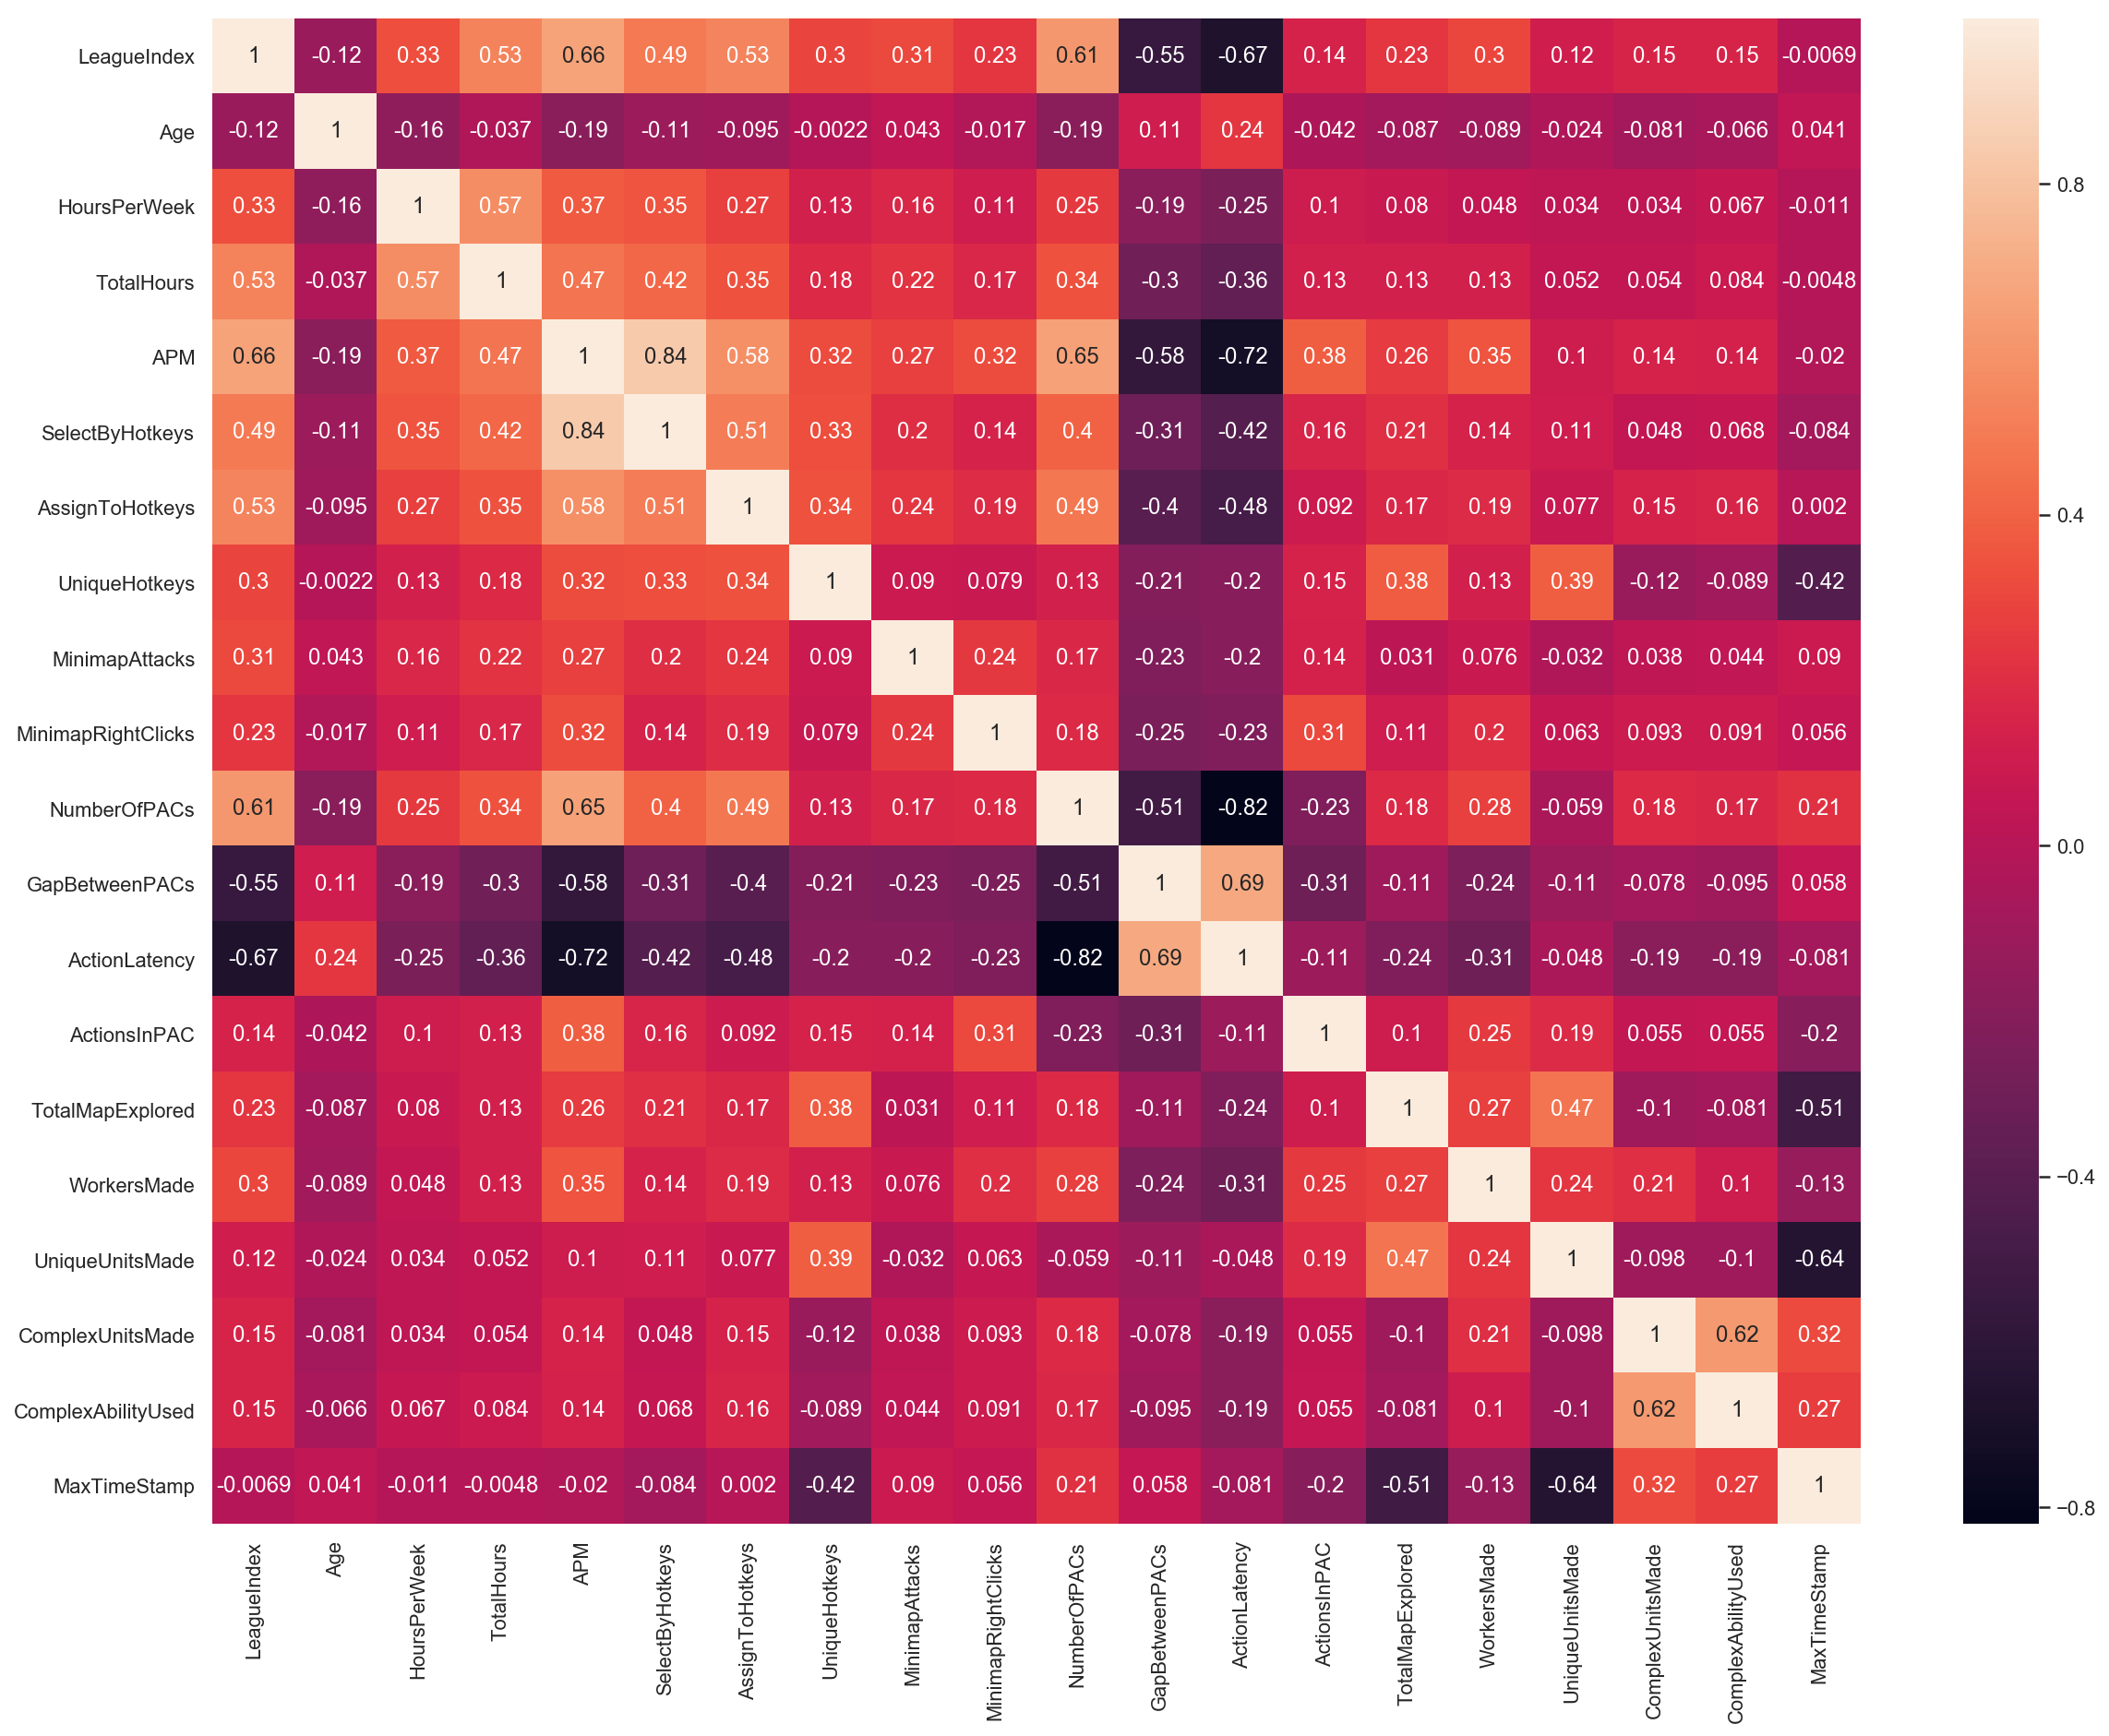

In [39]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(scs.corr(), annot=True)

In [28]:
result = normal_test_yj(scns)
# result['Features'] = scns.drop(scns.columns[0], axis=1).columns
result

,YJ_Stats,YJ_Results
Age,Fail,"(0.9799078702926636, 2.148355869913746e-21)"
HoursPerWeek,Fail,"(0.9856060743331909, 5.584237171931692e-18)"
TotalHours,Fail,"(0.9889110922813416, 1.5660944627715265e-15)"
APM,Pass,"(0.9993990659713745, 0.36897405982017517)"
SelectByHotkeys,Fail,"(0.9525288939476013, 1.1185056793978125e-31)"
AssignToHotkeys,Fail,"(0.990676999092102, 5.180560570371834e-14)"
UniqueHotkeys,Fail,"(0.991369366645813, 2.304733281392052e-13)"
MinimapAttacks,Fail,"(0.8844879269599915, 1.401298464324817e-44)"
MinimapRightClicks,Fail,"(0.9725834131240845, 7.260757615973109e-25)"
NumberOfPACs,Pass,"(0.9993875026702881, 0.35051533579826355)"


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


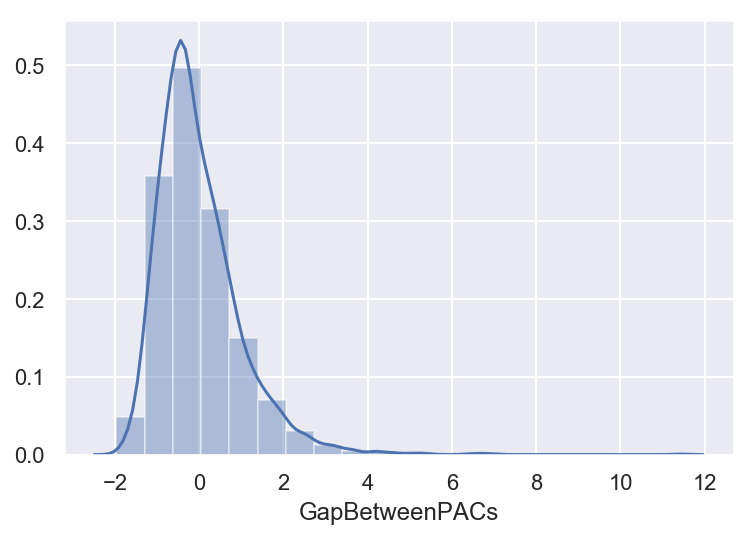

In [29]:
sns.distplot(scs['GapBetweenPACs'], bins=20)

# ADDITIONAL EDA RESULTS

## Parametric Model Features
Taking both normality and multicollinearity into account
- APM
- NumberOfPACs
- UniqueUnitsMade

## Non-Parametric Model Features
Only taking multicollinearity into account  
- HoursPerWeek
- APM
- UniqueHotkeys
- MinimapAttacks
- MinimapRightClicks
- NumberOfPACs
- ActionsInPAC
- WorkersMade
- UniqueUnitsMade
- ComplexAbilityUsed 